In [1]:
import matplotlib.pyplot as plt

from labs_simulation import run_genetic_algorithm

In [2]:
iterations_number = 100
iterations = [i for i in range(iterations_number)]

In [6]:
from math import cos, e, pi, prod, sqrt

def ackley_benchmark(x):
    a = 20
    b = 0.2
    c = 2 * pi
    n = len(x)
    return -a * e ** (-b * sqrt(sum((xi ** 2 for xi in x)) / n)) - \
           e ** (sum((cos(c * xi) for xi in x)) / n) + a + e

def de_jong_benchmark(x):
    return sum((xi ** 2 for xi in x))

def rastrigin_benchmark(x):
    n = len(x)
    return 10 * n + sum((xi ** 2 - 10 * cos(2 * pi * xi) for xi in x))

def griewank_benchmark(x):
    return sum((xi ** 2 / 4000 for xi in x)) - prod((cos(xi / sqrt(i + 1)) for i, xi in enumerate(x))) + 1

## Base algorithm

In [7]:
from jmetal.algorithm.singleobjective.genetic_algorithm import GeneticAlgorithm

In [8]:
base_fitness = [-1 for _ in range(iterations_number)]
base_benchmarks_ackley = [-1 for _ in range(iterations_number)]
base_benchmarks_de_jong = [-1 for _ in range(iterations_number)]
base_benchmarks_rastrigin = [-1 for _ in range(iterations_number)]
base_benchmarks_griewank = [-1 for _ in range(iterations_number)]
for i in range(iterations_number):
    result = run_genetic_algorithm(GeneticAlgorithm, 1.0, i)
    base_fitness[i] = result.objectives[0]
    base_benchmarks_ackley[i] = ackley_benchmark(result.variables[0])
    base_benchmarks_de_jong[i] = de_jong_benchmark(result.variables[0])
    base_benchmarks_rastrigin[i] = rastrigin_benchmark(result.variables[0])
    base_benchmarks_griewank[i] = griewank_benchmark(result.variables[0])

[2024-05-26 23:31:40,389] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:40,404] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:40,489] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:40,493] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:40,493] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:40,493] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:40,493] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:40,574] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:40,574] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:40,574] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:40,574] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:40,589] [jm

Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, False, True, False, False, False, True, True, False, False, True, False, False, False, False, True, True, True, False, True, True, False, True, True, False, False, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, False, False, True, False, False, False, True, False, False, True, True, True, True, False, True, True, False, True, True, False, True, True, True, False, True, True, True, False, False, True, False, False, True, True, True, False, False, False, True, True, False, False, True, False, False, True, False, False, True, True]
Fitness: 4218
Computing time: 0.10437917709350586
Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, False, False, True, False, True, False, True, False, False, False, True, False, True, True, True, True, True, True, False, False, True, False, False, False, True, False, False, True, True, Fals

[2024-05-26 23:31:40,721] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:40,721] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:40,721] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:40,721] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:40,736] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:40,790] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:40,790] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:40,790] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:40,790] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:40,805] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:40,874] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:40,874] [jmetal.core.al

Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, False, False, False, False, True, True, False, True, False, False, False, False, False, False, True, True, True, False, False, False, False, True, False, False, True, False, True, True, False, False, False, True, False, True, True, False, True, False, True, False, True, False, False, False, True, False, False, False, False, False, False, True, False, True, True, True, True, True, True, True, False, True, False, False, False, False, True, True, True, False, True, False, False, False, False, False, False, False, True, True, True, False, True, False, True, True, False, True, False, False, True, False, True, False, True, True, True, True, True]
Fitness: 5346
Computing time: 0.0781400203704834
Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, False, False, False, False, True, True, True, True, False, True, True, False, True, False, True, True, False, False, False, False, True, True, True, True, True, False, False, True, F

[2024-05-26 23:31:40,959] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:40,959] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:40,959] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:40,959] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:40,975] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:41,044] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:41,044] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:41,044] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:41,044] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:41,044] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:41,106] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:41,106] [jmetal.core.al

Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, False, False, True, True, True, True, True, False, False, False, True, False, False, False, False, True, True, True, True, False, False, False, False, False, False, True, False, False, False, True, True, False, False, True, False, True, False, True, False, True, True, False, False, False, False, False, True, False, True, True, False, False, True, True, False, False, True, True, False, False, False, False, False, False, False, True, False, True, True, False, False, False, False, False, True, True, True, True, False, False, False, False, False, True, True, False, False, False, False, False, True, False, False, False, True, True, True, True, False]
Fitness: 5682
Computing time: 0.0846562385559082
Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, True, True, True, True, False, True, False, True, False, False, False, True, False, True, True, True, False, False, True, True, True, True, False, True, False, False, True, Tru

[2024-05-26 23:31:41,196] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:41,196] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:41,196] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:41,196] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:41,212] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:41,307] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:41,307] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:41,307] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:41,307] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:41,307] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:41,376] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:41,376] [jmetal.core.al

Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, True, False, True, True, False, True, False, False, False, True, False, True, False, True, False, False, False, False, True, True, False, False, True, True, True, False, True, True, True, True, True, False, False, True, False, True, False, False, True, True, True, True, False, False, False, True, True, False, False, False, False, False, True, False, False, False, False, False, True, True, True, True, True, True, False, True, True, False, True, False, True, True, False, True, False, False, True, True, True, True, True, True, True, False, False, True, False, False, False, True, False, True, False, False, True, True, True, True, False]
Fitness: 3858
Computing time: 0.08987164497375488
Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, True, False, False, False, False, True, False, False, True, False, False, False, False, False, False, True, True, False, True, True, True, False, False, False, False, False, True, True, Tru

[2024-05-26 23:31:41,460] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:41,460] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:41,460] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:41,460] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:41,476] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:41,545] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:41,545] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:41,545] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:41,545] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:41,545] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:41,607] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:41,607] [jmetal.core.al

Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, True, False, False, False, False, False, False, True, False, False, True, False, False, True, True, False, True, False, False, False, True, False, False, False, False, True, False, False, False, True, True, False, False, False, True, False, True, True, True, True, True, False, False, False, True, True, False, True, False, True, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, True, False, True, False, False, True, False, False, False, False, True, False, False, False, True, True, False, True, False, True, True, False, False, True, False, True, True, False, False, False, False, True]
Fitness: 5086
Computing time: 0.08469247817993164
Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, False, True, False, False, True, False, False, True, False, True, False, True, True, True, True, True, False, True, False, False, True, True, True, True, False, False, Fal

[2024-05-26 23:31:41,692] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:41,692] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:41,692] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:41,708] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:41,761] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:41,761] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:41,761] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:41,761] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:41,773] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:41,845] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:41,845] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, False, True, False, False, True, True, True, False, True, False, True, False, False, False, True, False, False, True, True, False, False, True, False, False, False, False, True, False, False, True, True, False, True, False, True, False, False, True, False, False, True, True, True, False, True, True, True, True, True, True, False, True, False, True, False, True, False, True, True, True, False, False, True, True, False, False, True, False, False, True, False, True, False, True, False, False, True, True, False, True, True, True, False, True, True, False, True, False, False, True, True, True, True, False, True, False, True, True, False]
Fitness: 4830
Computing time: 0.08462095260620117
Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, False, True, False, False, False, False, True, True, True, True, True, True, False, False, True, True, True, False, True, True, False, False, False, True, False, False, False, False, True,

[2024-05-26 23:31:41,908] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:41,908] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:41,908] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:41,924] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:41,977] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:41,977] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:41,977] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:41,993] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:41,993] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:42,062] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:42,062] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, True, True, False, False, True, True, False, False, True, True, False, False, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, True, False, False, True, True, True, True, False, False, True, True, False, True, True, True, True, True, False, False, False, True, True, False, True, False, False, True, True, False, False, False, False, True, True, True, True, True, False, True, True, False, False, False, True, False, True, True, False, True, True, True, False, True, True, True, False, False, True, False, True, False, False, True, False, False, False, False, False, False, False]
Fitness: 3970
Computing time: 0.06251192092895508
Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, True, False, False, True, True, True, True, False, True, False, False, False, False, False, True, True, True, False, False, True, False, True, False, True, True, True, False, True, 

[2024-05-26 23:31:42,140] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:42,140] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:42,140] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:42,146] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:42,240] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:42,240] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:42,247] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:42,247] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:42,247] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:42,309] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:42,325] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, False, True, True, True, False, True, False, True, True, True, False, False, True, False, False, False, True, False, False, True, False, True, True, True, True, False, True, True, True, False, True, True, True, True, True, True, True, True, False, True, False, False, False, True, False, True, True, False, False, False, True, True, False, True, False, True, True, True, True, False, True, False, True, True, False, True, False, True, True, False, False, True, True, True, True, True, True, False, False, True, True, False, True, False, False, False, False, False, True, True, True, False, True, True, True, False, True, True, True]
Fitness: 3930
Computing time: 0.07813525199890137
Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, False, False, False, False, False, True, False, False, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, False, False, True, True, False, False, True, Tru

[2024-05-26 23:31:42,394] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:42,394] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:42,394] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:42,394] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:42,410] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:42,463] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:42,463] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:42,463] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:42,463] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:42,479] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:42,563] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:42,563] [jmetal.core.al

Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, True, True, True, False, False, True, False, False, True, False, True, False, False, True, True, True, False, True, True, True, True, True, True, False, False, True, False, True, True, False, False, False, False, False, False, True, False, True, False, True, True, True, False, True, False, False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, True, False, True, True, False, False, True, False, True, False, True, True, False, False, False, False, True, True, True, False, False, False, False, True, False, True, False, False, True, True, False, False, False]
Fitness: 6870
Computing time: 0.06897854804992676
Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, False, True, False, False, False, True, False, True, False, True, False, True, False, False, True, False, False, True, True, False, False, True, True, True, False, False, True, 

[2024-05-26 23:31:42,648] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:42,648] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:42,648] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:42,648] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:42,726] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:42,742] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:42,742] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:42,742] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:42,748] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:42,795] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:42,795] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, True, True, True, False, False, True, False, False, False, False, True, False, False, False, True, True, False, False, False, False, False, False, True, True, True, True, False, False, True, False, False, True, True, False, True, True, False, False, True, False, True, False, True, True, True, True, False, False, True, True, False, False, True, True, False, True, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, True, True, True, True, False, False, False, False, True, False, True, False, True, True, True, True, True, True, False]
Fitness: 4114
Computing time: 0.08459305763244629
Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, True, False, False, False, True, True, True, True, False, False, False, False, False, False, False, False, True, True, True, True, False, False, False, False, True, False, True, True,

[2024-05-26 23:31:42,880] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:42,880] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:42,880] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:42,880] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:42,895] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:42,980] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:42,980] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:42,980] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:42,980] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:42,996] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...


Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, True, False, True, False, False, True, True, True, False, False, True, True, True, True, False, True, False, False, True, False, True, False, False, True, True, False, True, False, True, False, False, False, True, True, True, True, True, False, True, True, False, True, True, True, True, True, False, True, False, False, True, True, False, False, True, False, False, False, False, True, False, True, False, True, True, True, False, True, True, False, False, False, True, False, False, True, True, False, False, False, False, True, True, False, True, False, True, True, False, False, True, False, True, True, True, False, False, True, True]
Fitness: 4122
Computing time: 0.06903481483459473
Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, False, True, False, True, False, True, False, False, False, True, True, True, True, True, True, True, True, True, False, True, False, False, False, False, True, False, False, False, False, 

[2024-05-26 23:31:43,065] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:43,065] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:43,065] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:43,065] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:43,080] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:43,149] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:43,149] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:43,149] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:43,149] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:43,165] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...


Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, True, True, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, True, False, True, True, True, False, True, True, False, False, True, True, False, False, False, False, False, False, True, False, True, False, False, True, True, False, True, False, False, False, True, False, False, True, True, False, True, False, True, True, False, False, True, False, False, True, False, False, True, False, True, False, True, True, False, False, False, False, True, True, False, False, False, True, False, False, False, True, False, True, True, True, True, False, True, True, False, False]
Fitness: 3582
Computing time: 0.08465862274169922
Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, True, False, True, True, True, True, False, False, False, False, True, False, False, True, False, False, False, False, True, True, True, True, False, False, True, False, False,

[2024-05-26 23:31:43,265] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:43,265] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:43,265] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:43,265] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:43,281] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:43,350] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:43,350] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:43,350] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:43,350] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:43,365] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:43,450] [jmetal.core.algorithm] [DEBUG] Initializing progress...


Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, True, False, True, False, False, True, True, False, False, True, False, True, True, True, True, True, False, False, False, True, True, False, False, True, True, False, False, False, True, False, False, True, True, True, False, True, False, True, False, False, False, False, False, True, False, False, True, False, True, True, False, False, True, True, True, True, True, True, True, True, False, False, False, True, True, False, True, True, False, False, False, False, True, False, False, False, False, False, True, True, True, False, True, True, False, True, True, False, False, True, True, False, True, True, True, True, True, False, True]
Fitness: 4766
Computing time: 0.11595582962036133
Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, True, False, False, False, True, False, False, True, False, False, True, True, False, True, True, True, False, True, True, False, True, True, False, False, False, False, True, True, True,

[2024-05-26 23:31:43,450] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:43,450] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:43,450] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:43,478] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:43,541] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:43,541] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:43,541] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:43,541] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:43,550] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:43,612] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:43,612] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, False, False, True, True, False, False, False, True, False, True, True, True, False, True, True, False, True, True, False, True, True, False, False, True, True, True, False, False, False, True, False, False, True, False, False, False, True, True, False, True, False, False, False, False, False, True, False, True, True, False, False, True, False, True, True, False, False, False, False, False, True, True, True, False, True, False, True, False, False, False, True, True, False, False, False, True, True, False, True, True, True, False, True, False, False, True, False, True, False, True, False, False, True, False, False, False, False, False, False]
Fitness: 3854
Computing time: 0.1002812385559082
Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, False, False, True, True, True, True, False, False, False, True, True, False, False, True, False, False, False, False, False, True, True, False, False, False, True, False, False, T

[2024-05-26 23:31:43,628] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:43,713] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:43,713] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:43,713] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:43,713] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:43,713] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:43,797] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:43,797] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:43,797] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:43,797] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:43,813] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:43,882] [jmetal.core.alg

Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, True, True, True, False, False, True, True, False, False, False, False, False, True, True, True, True, False, True, False, True, True, True, True, True, True, False, False, False, False, False, True, True, False, False, False, False, False, False, True, True, True, False, True, True, False, False, True, False, True, False, True, True, True, True, False, True, False, True, True, True, True, True, False, False, False, True, True, False, True, True, True, True, True, False, False, False, False, False, False, True, False, True, True, True, True, False, True, False, True, True, False, False, True, True, False, False, True, True, False]
Fitness: 4410
Computing time: 0.0848689079284668
Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, False, True, False, False, False, True, False, False, True, False, True, False, False, False, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, False,

[2024-05-26 23:31:43,897] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:43,966] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:43,966] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:43,966] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:43,966] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:43,998] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:44,051] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:44,051] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:44,051] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:44,051] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:44,067] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:44,145] [jmetal.core.alg

Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, False, False, False, True, False, True, True, True, False, False, True, False, False, True, False, False, True, False, False, True, True, True, True, True, False, True, True, False, True, False, True, True, False, True, True, True, False, False, False, False, False, True, False, True, False, True, True, True, False, False, True, True, True, True, True, False, True, False, False, True, False, False, False, True, True, True, True, False, False, True, False, True, False, False, False, True, True, True, False, False, True, True, True, False, False, True, True, False, False, False, True, False, False, False, False, True, True, False, False]
Fitness: 4386
Computing time: 0.08469009399414062
Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, False, False, False, True, False, True, False, True, False, True, True, True, False, True, False, False, False, False, True, False, True, False, False, True, False, True, True, True, Tr

[2024-05-26 23:31:44,145] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:44,145] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:44,145] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:44,151] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:44,229] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:44,229] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:44,229] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:44,229] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:44,252] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:44,314] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:44,314] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, False, False, True, False, False, False, False, False, False, True, True, True, False, False, True, False, False, False, True, False, False, True, False, False, False, True, False, True, False, False, True, False, True, True, True, False, False, False, False, False, False, True, False, False, True, False, True, True, False, True, True, True, False, False, True, False, True, True, False, False, True, False, True, False, False, True, True, True, False, False, False, True, True, False, False, True, True, False, True, True, False, False, False, True, False, False, False, False, False, True, False, True, False, True, False, True, False, True, False]
Fitness: 3714
Computing time: 0.09377360343933105
Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, False, False, False, False, True, False, False, True, False, False, False, True, False, True, True, True, True, True, False, False, True, True, False, True, False, True, False, 

[2024-05-26 23:31:44,399] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:44,399] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:44,399] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:44,399] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:44,414] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:44,499] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:44,499] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:44,499] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:44,499] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:44,515] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:44,568] [jmetal.core.algorithm] [DEBUG] Initializing progress...


Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, True, True, False, False, True, False, True, False, True, False, False, True, False, False, True, False, True, True, True, True, False, True, False, True, False, False, False, True, False, False, True, True, False, False, False, True, True, True, True, True, True, False, False, True, True, True, False, False, False, True, False, True, True, False, True, False, True, False, False, False, False, False, True, False, True, False, True, True, True, False, True, False, False, False, True, False, False, False, False, False, True, False, True, True, False, False, True, False, True, False, True, True, True, True, False, True, False, False, False]
Fitness: 5314
Computing time: 0.0846860408782959
Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, True, True, True, True, True, False, False, True, True, True, False, False, False, False, False, False, False, True, False, False, False, True, True, False, False, False, False, True, 

[2024-05-26 23:31:44,584] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:44,584] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:44,584] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:44,584] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:44,668] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:44,668] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:44,668] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:44,668] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:44,684] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:44,753] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:44,753] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, True, False, False, False, True, False, False, True, False, False, False, False, False, True, True, True, False, True, False, True, True, False, True, True, False, False, False, False, True, False, False, True, False, False, False, True, True, False, True, False, True, True, True, True, False, True, True, True, True, False, True, False, True, False, True, False, False, False, False, True, True, False, True, False, True, False, False, False, False, False, True, False, False, True, False, False, True, True, True, False, True, False, True, True, True, True, False, True, False, True, False, False, False, True, False, False, False, True, False]
Fitness: 4706
Computing time: 0.08470392227172852
Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, False, False, True, False, True, False, True, True, True, True, False, True, True, False, False, False, True, False, False, True, True, False, False, False, True, False, False, True

[2024-05-26 23:31:44,769] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:44,831] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:44,831] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:44,831] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:44,847] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:44,853] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:44,916] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:44,916] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:44,916] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:44,916] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:44,932] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:45,016] [jmetal.core.alg

Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, False, False, False, False, True, True, True, True, False, False, False, False, False, False, False, True, False, False, True, True, True, False, False, False, True, True, True, False, True, False, True, True, False, False, True, True, True, True, False, True, False, False, False, True, True, True, True, False, False, False, False, False, False, False, True, False, True, True, True, False, False, True, True, False, True, True, False, False, True, True, False, False, False, True, False, True, False, True, False, False, True, False, False, True, False, True, True, False, False, False, False, True, True, False, False, True, True, False, False]
Fitness: 5826
Computing time: 0.07814788818359375
Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, True, False, False, True, True, False, False, True, False, True, False, False, False, False, True, False, True, False, False, False, False, True, False, False, True, True, True, Fal

[2024-05-26 23:31:45,117] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:45,117] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:45,117] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:45,117] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:45,132] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:45,201] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:45,201] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:45,201] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:45,217] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:45,217] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:45,301] [jmetal.core.algorithm] [DEBUG] Initializing progress...


Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, True, True, True, False, False, False, False, False, True, False, False, True, True, True, False, True, True, True, False, False, True, True, False, False, True, True, False, True, True, True, True, False, False, False, True, False, True, False, True, True, False, True, False, True, True, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, True, True, False, False, True, True, True, True, False, False, False, False, True, True, True, False, True, True, False, True, True, True, False, True, False, True, True, True, True, False, False, True, True, False, False, False, False, False, False]
Fitness: 5714
Computing time: 0.10030126571655273
Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, True, False, True, False, True, True, False, True, True, False, False, True, True, False, True, False, False, False, False, True, True, True, True, True, True, False, True, True, True, 

[2024-05-26 23:31:45,301] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:45,301] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:45,301] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:45,317] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:45,386] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:45,386] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:45,386] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:45,402] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:45,402] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:45,502] [jmetal.core.algorithm] [DEBUG] Initializing progress...


Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, True, True, True, True, False, True, False, False, False, False, True, False, False, True, True, True, True, False, True, True, True, False, False, False, False, True, False, True, False, True, False, False, False, True, True, True, False, True, True, True, True, False, False, True, True, False, True, True, False, False, False, False, True, False, False, False, True, True, True, False, True, False, True, False, True, False, False, True, False, True, False, True, True, True, False, False, True, True, True, False, True, True, True, False, False, True, True, False, False, False, True, True, False, False, True, True, False, False, False]
Fitness: 9606
Computing time: 0.08466529846191406
Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, False, False, False, False, True, False, True, False, True, False, False, True, True, True, True, False, True, True, False, False, True, False, True, False, False, True, True, False, True

[2024-05-26 23:31:45,502] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:45,502] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:45,502] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:45,518] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:45,603] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:45,603] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:45,603] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:45,603] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:45,656] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...


Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, False, False, False, False, True, True, True, True, True, False, True, True, True, False, True, True, True, False, False, False, False, False, False, False, False, True, False, True, True, True, False, False, True, True, False, False, True, False, True, True, True, False, False, True, False, True, False, False, False, False, True, False, True, True, True, False, False, True, True, False, True, False, False, True, True, False, True, True, False, True, True, False, True, False, False, False, True, False, True, False, False, False, False, True, True, True, False, True, False, True, True, False, False, False, True, True, True, False, True]
Fitness: 4474
Computing time: 0.10033226013183594
Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, False, False, False, False, False, False, True, True, True, False, False, False, False, True, False, False, False, True, True, True, False, False, False, True, True, False, False, True,

[2024-05-26 23:31:45,734] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:45,734] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:45,734] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:45,734] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:45,756] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:45,819] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:45,819] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:45,819] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:45,819] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:45,834] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...


Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, False, True, False, True, False, False, True, True, True, True, False, False, False, False, False, True, False, False, True, True, True, True, True, False, True, True, True, True, True, False, False, False, True, False, True, False, False, True, False, False, True, True, True, False, True, True, False, False, True, False, True, False, True, False, True, False, True, False, True, True, False, False, False, True, True, False, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, False, False, False, False, True, True, True, False, False, True, True, True, True]
Fitness: 4146
Computing time: 0.1313021183013916
Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, False, False, False, True, True, True, True, True, False, True, True, True, True, False, False, False, True, False, True, False, True, False, False, True, False, True, True, True, True, True, Fal

[2024-05-26 23:31:45,956] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:45,956] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:45,956] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:45,956] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:45,972] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:46,035] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:46,035] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:46,050] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:46,050] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:46,057] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:46,151] [jmetal.core.algorithm] [DEBUG] Initializing progress...


Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, False, True, True, True, False, False, True, False, False, False, True, True, False, False, False, False, True, True, False, True, False, False, True, True, False, True, False, True, True, False, False, False, True, True, True, False, False, True, True, True, False, False, True, False, True, False, True, False, False, True, False, True, False, True, False, False, True, True, False, True, False, False, True, False, True, False, True, True, False, True, True, True, False, True, False, False, False, False, True, True, True, False, False, False, True, False, True, False, True, True, False, True, True, True, False, True, False, True, False]
Fitness: 5170
Computing time: 0.13768458366394043
Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, False, False, False, True, True, True, False, True, True, True, True, True, True, False, True, False, True, False, False, False, False, True, True, True, False, False, True, False, True

[2024-05-26 23:31:46,151] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:46,151] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:46,157] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:46,157] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:46,251] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:46,251] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:46,251] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:46,251] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:46,257] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:46,335] [jmetal.core.algorithm] [DEBUG] Initializing progress...


Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, True, False, True, True, True, False, False, False, False, True, False, True, True, False, True, False, False, False, False, True, False, True, False, False, False, False, True, True, False, False, False, True, True, False, False, False, True, True, False, True, True, False, False, False, True, False, False, False, True, False, True, False, True, False, True, False, False, False, True, False, True, False, False, True, False, False, False, False, False, True, True, False, False, True, True, False, False, True, True, True, True, True, False, True, False, True, False, True, True, True, False, False, False, False, True, False, True, True, False]
Fitness: 3758
Computing time: 0.10686397552490234
Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, False, True, True, False, False, False, True, True, True, True, True, True, False, False, False, True, False, False, True, True, False, True, False, False, False, True, False, Fals

[2024-05-26 23:31:46,335] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:46,335] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:46,351] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:46,357] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:46,458] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:46,458] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:46,458] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:46,458] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:46,473] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:46,536] [jmetal.core.algorithm] [DEBUG] Initializing progress...


Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, False, False, False, False, True, False, False, True, True, False, True, True, True, False, False, False, False, False, True, False, True, True, True, False, True, False, True, True, True, False, False, True, True, False, False, False, True, True, False, False, True, True, True, True, True, False, True, True, True, False, True, False, False, True, True, False, True, False, False, True, True, False, False, False, False, True, True, False, False, False, True, True, False, True, True, False, True, False, True, False, True, True, False, True, False, True, True, False, True, True, True, True, True, False, True, False, True, True, False]
Fitness: 4102
Computing time: 0.10028529167175293
Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, False, True, False, False, False, True, False, True, False, True, False, True, False, False, True, False, True, False, True, True, True, True, False, True, False, True, True, True, False, Tr

[2024-05-26 23:31:46,552] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:46,552] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:46,552] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:46,558] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:46,644] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:46,646] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:46,647] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:46,648] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:46,658] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:46,705] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:46,705] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, True, False, True, True, True, False, True, False, True, False, True, False, True, True, True, False, True, True, True, False, False, False, True, True, False, False, True, False, True, True, False, True, True, False, False, False, True, False, True, True, False, True, True, False, True, True, False, False, False, False, True, True, True, False, True, True, False, True, False, True, True, False, True, False, False, False, False, False, False, True, True, False, False, False, False, False, False, True, False, True, False, True, False, True, True, False, True, True, True, False, False, False, False, True, True, True, False, True, True]
Fitness: 4938
Computing time: 0.0937659740447998
Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, False, True, True, True, False, True, False, True, False, True, True, True, True, False, True, False, True, False, True, False, False, True, False, False, True, True, False, False, True, T

[2024-05-26 23:31:46,774] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:46,774] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:46,774] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:46,790] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:46,790] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:46,859] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:46,859] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:46,859] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:46,859] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:46,874] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:46,937] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:46,937] [jmetal.core.al

Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, True, True, True, True, True, False, False, False, False, False, True, False, True, False, True, True, False, True, True, False, True, True, False, True, False, False, True, True, False, True, True, False, False, True, True, False, True, True, True, True, False, True, False, True, True, False, False, True, True, True, True, False, True, False, True, True, True, True, False, True, True, False, False, True, True, True, True, False, True, False, False, True, False, True, False, False, True, False, True, True, False, True, True, True, False, False, False, False, True, True, False, False, False, False, True, False, False, True, True]
Fitness: 6066
Computing time: 0.08466601371765137
Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, False, False, True, True, True, False, False, True, False, True, True, False, True, False, False, True, False, False, True, True, False, False, False, True, False, False, True, True, True, True

[2024-05-26 23:31:47,006] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:47,021] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:47,021] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:47,021] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:47,106] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:47,106] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:47,106] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:47,106] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:47,122] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:47,190] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:47,190] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, True, False, False, False, False, True, True, True, False, False, True, False, True, True, False, False, True, True, True, True, True, True, False, True, True, False, False, False, True, True, True, False, False, True, True, False, False, True, False, True, True, True, True, False, False, False, True, False, True, True, False, True, False, False, True, False, True, True, True, False, True, True, True, True, False, False, True, False, True, True, False, False, True, False, False, True, True, True, False, True, True, False, False, False, True, True, True, True, False, False, True, True, False, True, True, True, False, False, False]
Fitness: 4266
Computing time: 0.08464431762695312
Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, False, True, True, False, False, True, False, True, True, False, True, True, True, False, True, False, False, True, True, False, False, False, True, True, True, True, True, True, True, False

[2024-05-26 23:31:47,206] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:47,275] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:47,291] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:47,291] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:47,291] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:47,291] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:47,359] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:47,359] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:47,359] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:47,359] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:47,375] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:47,459] [jmetal.core.alg

Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, True, False, False, False, True, False, True, False, False, False, True, True, True, False, False, False, True, False, False, False, True, True, True, False, True, True, True, True, True, False, False, False, False, True, False, True, False, True, True, False, False, True, True, False, True, True, True, True, False, True, True, False, False, False, True, False, True, True, True, False, True, True, True, True, False, True, True, True, False, False, True, True, True, False, True, True, False, False, True, True, False, True, False, True, True, False, True, False, True, False, False, False, False, False, True, False, False, False, False]
Fitness: 5314
Computing time: 0.10049962997436523
Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, True, True, False, False, True, False, False, True, True, False, False, False, True, True, False, True, True, False, True, False, False, True, False, True, False, False, False, True, True

[2024-05-26 23:31:47,559] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:47,559] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:47,559] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:47,559] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:47,636] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:47,636] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:47,636] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:47,636] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:47,660] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:47,722] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:47,722] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, False, True, True, True, False, True, False, False, True, True, True, True, False, False, True, True, True, True, False, True, True, True, False, False, False, True, False, True, False, False, True, True, True, False, True, True, True, True, False, True, False, False, False, False, False, False, True, False, True, False, False, False, True, False, True, False, True, True, False, True, False, True, True, True, False, False, True, True, False, False, False, True, True, False, True, False, True, True, False, True, False, True, False, True, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False]
Fitness: 5622
Computing time: 0.0998539924621582
Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, False, True, False, True, True, True, False, False, True, True, True, False, False, False, False, False, True, True, True, True, False, False, False, True, True, False, True, False, Tru

[2024-05-26 23:31:47,738] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:47,807] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:47,807] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:47,807] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:47,821] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:47,821] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:47,891] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:47,891] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:47,891] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:47,891] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:47,907] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:47,976] [jmetal.core.alg

Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, False, False, False, True, False, False, False, True, True, False, False, True, False, False, False, True, True, True, False, True, True, False, False, True, True, True, True, False, True, False, True, False, False, False, True, True, True, True, True, True, True, False, True, True, True, True, True, False, False, False, True, False, True, True, False, False, False, False, True, True, False, False, True, False, False, False, False, False, True, False, True, False, True, False, True, False, True, True, False, True, True, True, False, False, True, False, True, False, False, True, False, True, False, True, True, False, False, False, False]
Fitness: 3914
Computing time: 0.08364295959472656
Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, True, False, True, True, True, True, True, True, False, True, True, False, False, False, False, False, False, True, False, True, False, False, True, True, False, False, False, True, Tr

[2024-05-26 23:31:48,067] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:48,069] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:48,069] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:48,069] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:48,147] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:48,147] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:48,147] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:48,147] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:48,161] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:48,223] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:48,223] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, True, True, False, False, False, True, False, False, True, False, False, True, False, False, False, True, False, True, True, False, True, False, True, True, True, True, False, True, True, True, True, True, True, False, False, False, True, True, False, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, True, False, True, True, False, True, True, True, True, False, False, False, False, False, False, False, True, False, True, True, False, True, False]
Fitness: 6502
Computing time: 0.09247469902038574
Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, False, True, True, False, True, True, True, True, False, True, True, False, True, False, True, True, True, True, True, False, False, True, False, True, False, False, True, False, False, True

[2024-05-26 23:31:48,308] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:48,308] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:48,308] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:48,308] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:48,324] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:48,393] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:48,393] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:48,393] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:48,393] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:48,393] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:48,462] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:48,462] [jmetal.core.al

Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, True, False, True, True, False, True, True, False, True, True, False, False, True, False, True, True, True, True, False, False, False, False, False, True, False, False, True, True, True, False, True, True, False, False, True, False, False, False, True, True, False, False, False, False, True, False, True, True, True, False, False, True, False, True, True, True, False, False, False, True, False, False, True, True, False, False, True, True, False, True, False, False, True, True, False, False, False, True, True, False, True, True, False, False, True, True, False, False, True, False, False, True, False, True, False, True, True, False, True]
Fitness: 5962
Computing time: 0.08470344543457031
Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, True, False, True, False, False, True, False, False, True, True, True, False, True, True, False, False, True, True, False, False, True, False, True, True, False, False, False, True, Tru

[2024-05-26 23:31:48,562] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:48,562] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:48,562] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:48,562] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:48,562] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:48,656] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:48,656] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:48,656] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:48,656] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:48,662] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:48,725] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:48,725] [jmetal.core.al

Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, True, True, False, False, True, False, True, False, True, False, False, True, False, False, False, False, False, True, False, False, False, True, True, True, True, False, False, False, False, True, True, False, False, True, True, True, False, False, True, True, True, False, False, False, True, True, True, False, False, False, False, True, False, True, False, True, True, True, True, False, False, True, False, True, False, True, True, False, False, False, True, True, False, True, False, True, False, False, True, False, False, True, False, False, False, True, False, False, False, True, True, True, False, True, True, False, False, True, False]
Fitness: 4622
Computing time: 0.0846400260925293
Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, True, True, False, False, False, False, True, True, False, True, False, True, True, False, True, True, True, True, False, False, True, True, False, False, True, False, True, True, Fa

[2024-05-26 23:31:48,825] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:48,825] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:48,825] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:48,825] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:48,840] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:48,891] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:48,891] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:48,907] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:48,907] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:48,907] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:48,978] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:48,978] [jmetal.core.al

Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, False, False, False, True, True, False, False, True, False, True, True, False, True, True, False, False, False, True, True, True, False, False, True, False, True, True, True, False, True, False, True, False, False, False, True, True, False, True, True, True, True, True, False, True, False, True, False, True, True, False, True, True, True, True, False, True, True, False, True, False, False, False, True, True, False, True, False, True, True, False, True, False, False, False, False, True, True, True, False, False, False, True, True, True, True, True, True, False, True, True, False, True, False, True, False, False, False, True, True]
Fitness: 4778
Computing time: 0.10002326965332031
Algorithm: Genetic algorithm
Problem: LABS
Solution: [True, True, False, False, False, False, False, False, False, True, False, True, True, True, True, True, True, True, True, False, False, True, True, False, False, True, True, True, True, True, True,

[2024-05-26 23:31:49,094] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:49,094] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:49,094] [jmetal.core.algorithm] [DEBUG] Finished!


Algorithm: Genetic algorithm
Problem: LABS
Solution: [False, True, True, False, True, True, False, False, True, False, True, False, False, False, False, False, True, False, False, True, False, True, False, False, True, False, True, True, False, True, True, False, True, True, True, True, True, True, False, True, False, False, False, True, True, False, False, True, False, False, False, False, True, True, False, True, True, True, True, False, True, True, False, True, False, False, True, True, True, True, False, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, True, True, False, True, True, False, True, True]
Fitness: 7502
Computing time: 0.10030102729797363


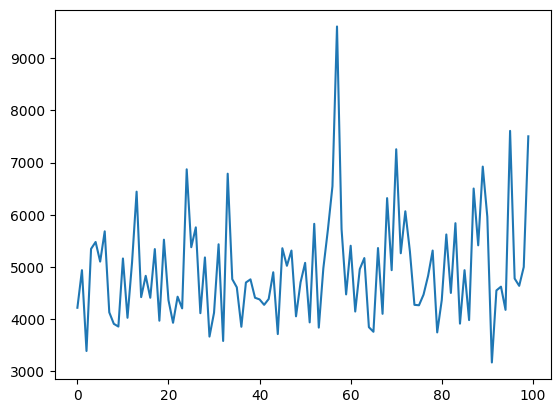

In [9]:
plt.plot(iterations, base_fitness)
plt.show()

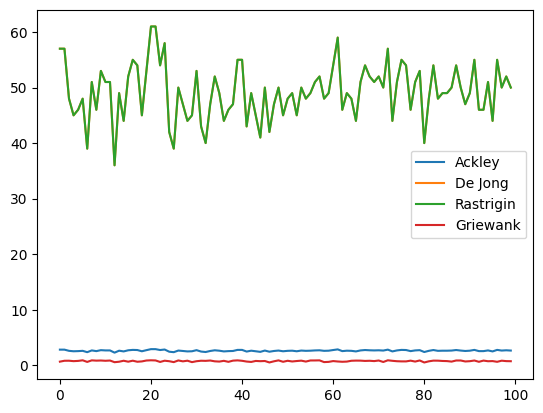

In [10]:
plt.plot(iterations, base_benchmarks_ackley, label="Ackley")
plt.plot(iterations, base_benchmarks_de_jong, label="De Jong")
plt.plot(iterations, base_benchmarks_rastrigin, label="Rastrigin")
plt.plot(iterations, base_benchmarks_griewank, label="Griewank")
plt.legend()
plt.show()

## Follow Best

In [11]:
from follow_best_mutation import FollowBestGA

In [12]:
follow_best_fitness = [-1 for _ in range(iterations_number)]
follow_best_benchmarks_ackley = [-1 for _ in range(iterations_number)]
follow_best_benchmarks_de_jong = [-1 for _ in range(iterations_number)]
follow_best_benchmarks_rastrigin = [-1 for _ in range(iterations_number)]
follow_best_benchmarks_griewank = [-1 for _ in range(iterations_number)]
for i in range(iterations_number):
    result = run_genetic_algorithm(FollowBestGA, 0.5, i)
    follow_best_fitness[i] = result.objectives[0]
    follow_best_benchmarks_ackley[i] = ackley_benchmark(result.variables[0])
    follow_best_benchmarks_de_jong[i] = de_jong_benchmark(result.variables[0])
    follow_best_benchmarks_rastrigin[i] = rastrigin_benchmark(result.variables[0])
    follow_best_benchmarks_griewank[i] = griewank_benchmark(result.variables[0])

[2024-05-26 23:31:49,611] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:49,627] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:49,697] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:49,697] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:49,697] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:49,705] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:49,717] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:49,802] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:49,802] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:49,802] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:49,818] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:49,834] [jm

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, False, True, True, False, True, True, True, False, True, False, True, False, False, True, True, True, True, False, False, False, True, True, True, False, False, False, True, False, False, False, False, False, True, True, True, True, True, False, True, True, False, False, True, False, False, False, False, False, True, False, False, False, True, False, True, True, False, True, False, False, False, False, False, False, False, True, True, True, False, True, True, True, False, True, False, False, False, False, True, True, False, False, True, True, True, False, True, True, True, True, False, False, True, True, False, False, False, False, True]
Fitness: 6546
Computing time: 0.08577895164489746
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, False, False, True, True, True, False, True, False, False, True, True, True, True, False, True, False, False, True, False, True, False, True, True, False, F

[2024-05-26 23:31:49,938] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:49,938] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:49,938] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:49,938] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:49,956] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:50,034] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:50,034] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:50,034] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:50,034] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:50,056] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...


Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, True, False, True, False, False, False, False, False, False, True, True, False, False, False, False, True, False, False, True, True, True, False, False, True, True, False, False, False, True, True, True, False, True, True, True, False, True, False, True, False, False, True, True, True, True, False, True, False, True, False, True, True, True, False, False, False, True, False, False, True, True, True, True, True, True, False, False, False, False, False, True, False, False, True, False, True, True, True, True, False, True, True, False, False, False, True, False, False, False, False, True, False, False, False, True, False, False, False, False]
Fitness: 6162
Computing time: 0.11961555480957031
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, False, True, True, False, False, False, True, False, False, True, False, False, False, True, False, True, True, True, True, True, True, False, True, True, 

[2024-05-26 23:31:50,119] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:50,119] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:50,119] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:50,119] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:50,134] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:50,203] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:50,203] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:50,203] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:50,203] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:50,219] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:50,288] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:50,288] [jmetal.core.al

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, True, False, False, True, False, True, True, False, False, True, False, False, True, True, True, False, True, True, False, False, False, False, False, True, False, False, False, True, False, True, False, True, False, False, True, True, True, False, False, True, True, False, False, False, True, True, False, False, True, True, False, False, True, True, False, False, True, True, False, False, True, False, True, False, True, True, True, True, False, True, True, False, False, True, True, True, False, False, True, True, True, True, True, False, False, False, True, False, False, False, True, False, True, False, True, False, True, False, False]
Fitness: 8278
Computing time: 0.08461761474609375
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, True, True, False, True, True, True, True, True, False, True, False, True, True, False, False, True, False, True, True, True, True, False, False, False, True,

[2024-05-26 23:31:50,303] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:50,303] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:50,303] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:50,372] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:50,372] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:50,372] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:50,372] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:50,404] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:50,457] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:50,457] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:50,457] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:50,457] [jmetal.core.algorithm] [DEBUG

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, False, False, False, True, False, True, False, False, True, True, False, False, False, False, True, True, False, True, True, False, False, True, True, True, True, True, True, False, False, True, False, True, False, False, False, False, True, True, False, False, False, False, True, False, True, False, True, False, False, True, False, False, True, False, False, False, True, False, False, False, False, True, False, False, False, False, False, True, False, True, True, True, False, False, False, True, False, True, False, True, False, True, True, False, False, False, True, False, True, True, False, True, False, False, True, True, False, True, True]
Fitness: 3538
Computing time: 0.10030055046081543
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, True, True, False, False, False, True, True, True, True, True, True, True, True, True, False, True, False, False, False, False, False, True, True, True,

[2024-05-26 23:31:50,557] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:50,557] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:50,557] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:50,573] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:50,651] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:50,657] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:50,657] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:50,657] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:50,657] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:50,736] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:50,736] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, True, True, True, True, True, False, False, True, True, True, True, False, False, True, True, True, True, False, False, False, False, False, True, False, True, True, True, False, False, False, False, True, True, False, True, False, False, True, True, False, False, False, False, True, True, False, False, False, True, True, False, False, False, False, True, True, False, False, True, True, False, False, False, True, False, False, True, False, False, True, True, False, False, True, False, False, False, True, True, False, False, True, True, True, False, True, False, True, False, True, False, True, False, True, False, True, True, False, True]
Fitness: 5058
Computing time: 0.10029864311218262
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, True, False, True, True, True, False, False, True, True, False, False, False, True, True, False, True, True, False, True, True, True, False, False, True, Fals

[2024-05-26 23:31:50,820] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:50,820] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:50,820] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:50,835] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:50,851] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:50,905] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:50,905] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:50,905] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:50,905] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:50,936] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:50,989] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:50,989] [jmetal.core.al

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, True, False, False, False, False, False, False, True, True, True, False, False, True, True, False, False, True, True, False, False, False, True, True, True, False, False, False, True, True, True, True, True, False, False, True, True, True, True, False, False, False, True, True, False, False, False, True, True, True, True, True, True, True, False, False, True, False, True, True, False, False, False, False, True, True, False, False, True, False, False, False, False, False, True, True, False, False, True, True, False, False, False, True, False, True, True, True, False, True, False, False, True, False, True, True, False, True, False, True]
Fitness: 4966
Computing time: 0.09984803199768066
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, False, False, True, False, True, True, True, True, True, True, True, True, False, True, False, False, True, False, True, False, True, False, False, False, False

[2024-05-26 23:31:51,073] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:51,073] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:51,073] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:51,073] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:51,089] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:51,152] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:51,152] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:51,152] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:51,152] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:51,158] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:51,216] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:51,232] [jmetal.core.al

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, True, False, True, False, True, False, False, True, False, False, True, True, False, True, True, False, False, True, False, False, True, False, False, True, False, True, True, True, True, True, True, False, True, False, True, False, True, True, False, True, True, False, False, False, False, False, False, True, False, True, True, True, True, True, False, False, False, True, True, True, True, True, False, False, True, False, False, True, True, True, False, False, True, False, False, True, True, False, True, False, False, False, True, True, True, True, True, False, True, True, False, False, True, False, False, True, False, False, False]
Fitness: 5714
Computing time: 0.08417296409606934
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, True, False, True, True, False, True, False, True, False, True, False, False, True, True, True, False, False, True, True, True, False, False, True, False, True,

[2024-05-26 23:31:51,305] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:51,305] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:51,305] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:51,305] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:51,321] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:51,421] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:51,421] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:51,421] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:51,421] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:51,437] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...


Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, True, False, False, False, False, True, False, False, True, False, False, False, True, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, True, True, True, False, False, True, False, True, True, True, True, True, False, False, False, True, False, True, True, True, False, True, False, True, True, True, False, True, True, True, True, False, True, True, False, False, True, True, False, False, True, True, False, True, False, False, False, False, False, False, True, True, False, False, False, False, True, False, True, False, False, True, True, True, False, False, False, False, True, True, False]
Fitness: 5130
Computing time: 0.07300090789794922
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, True, True, True, True, False, False, False, True, True, True, True, False, False, False, True, True, True, True, False, False, False, False, True, True,

[2024-05-26 23:31:51,506] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:51,506] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:51,506] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:51,506] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:51,506] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:51,574] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:51,574] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:51,574] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:51,574] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:51,590] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...


Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, False, True, True, True, False, False, False, False, True, False, False, False, False, True, True, True, False, True, True, False, False, True, False, False, False, True, False, False, True, False, True, True, True, True, True, False, False, False, False, True, True, True, False, False, True, False, True, False, True, True, False, True, False, False, True, False, True, True, False, False, True, False, True, True, True, False, True, True, False, True, False, False, False, False, False, True, False, True, True, False, True, True, False, True, False, False, True, True, False, True, True, False, True, True, False, True, True, True, False]
Fitness: 6030
Computing time: 0.0847623348236084
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, True, False, False, True, False, True, True, False, False, False, False, False, False, True, False, False, False, True, True, True, True, False, True, False, Tr

[2024-05-26 23:31:51,690] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:51,690] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:51,690] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:51,690] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:51,690] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:51,759] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:51,759] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:51,759] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:51,759] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:51,775] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:51,853] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:51,853] [jmetal.core.al

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, True, True, True, False, False, False, True, True, True, True, False, False, True, True, True, False, False, False, False, True, True, False, True, True, False, True, False, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, False, False, True, False, True, False, True, False, False, True, True, True, False, False, False, False, True, True, True, True, True, False, False, False, False, True, False, False, True, False, True, True, False, True, True, False, False, False, True, True, False, False, False, True, False, True, False, False, False, True, False, False, False, False, True, True]
Fitness: 4642
Computing time: 0.11590266227722168
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, True, False, False, True, True, False, True, True, True, False, True, False, True, True, False, True, True, False, True, False, True, True, False, True, False, Fal

[2024-05-26 23:31:51,954] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:51,954] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:51,954] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:51,954] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:51,960] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:52,020] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:52,036] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:52,036] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:52,036] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:52,036] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:52,107] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:52,107] [jmetal.core.al

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, False, False, True, False, True, False, False, False, False, False, False, False, True, True, False, True, False, True, True, True, False, True, True, True, True, False, False, False, True, True, False, True, True, False, False, False, False, True, False, False, True, False, False, True, True, True, False, False, False, True, False, False, True, False, True, True, False, True, True, False, True, False, True, True, False, False, True, True, False, True, True, False, True, True, False, False, False, True, False, False, True, True, False, False, False, False, False, True, True, True, True, True, True, True, True, False, True, False, False]
Fitness: 3546
Computing time: 0.10033869743347168
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, False, True, True, True, True, False, False, True, True, True, False, True, False, True, True, False, False, True, True, False, True, True, False, False, Fals

[2024-05-26 23:31:52,192] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:52,192] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:52,192] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:52,208] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:52,276] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:52,276] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:52,276] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:52,276] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:52,292] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:52,361] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:52,361] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, False, True, False, False, False, False, False, False, True, True, True, False, False, False, False, True, False, False, True, False, True, False, False, True, True, True, False, False, False, True, True, True, True, False, False, True, True, True, True, True, False, False, False, False, True, True, True, True, True, True, True, False, True, True, False, False, True, True, True, False, False, False, False, True, False, True, False, False, True, False, True, True, True, True, False, True, False, False, False, False, False, False, True, True, True, False, False, True, True, False, True, False, False, False, True, True, True, False, True]
Fitness: 4786
Computing time: 0.06907343864440918
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, True, False, False, False, True, False, False, False, True, True, True, False, False, True, True, True, False, True, False, True, True, False, True, False, Fal

[2024-05-26 23:31:52,439] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:52,439] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:52,439] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:52,439] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:52,461] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:52,524] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:52,524] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:52,524] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:52,524] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:52,539] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:52,608] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:52,608] [jmetal.core.al

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, False, False, False, True, False, True, False, True, True, False, False, False, False, False, False, True, False, True, True, True, False, True, False, False, False, True, False, True, True, True, False, False, False, True, False, False, True, True, False, False, False, True, False, False, True, False, False, True, False, False, False, True, False, True, True, True, True, False, False, False, True, True, True, False, False, False, True, True, False, True, False, False, True, True, False, False, True, False, True, True, False, True, True, True, False, False, True, True, False, True, False, False, False, False, True, True, False, False, False]
Fitness: 4558
Computing time: 0.07813739776611328
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, False, False, False, True, False, True, False, False, False, False, False, False, True, False, False, True, True, False, True, True, True, True, False, Tr

[2024-05-26 23:31:52,678] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:52,678] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:52,678] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:52,678] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:52,678] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:52,740] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:52,740] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:52,740] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:52,740] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:52,756] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:52,825] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:52,825] [jmetal.core.al

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, False, False, False, False, False, True, True, True, True, False, False, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, False, False, True, False, True, True, True, True, True, True, False, True, False, True, True, True, False, True, False, False, True, True, True, False, True, False, False, False, True, False, False, True, False, True, True, False, True, True, False, False, False, False, False, True, True, True, False, False, False, False, True, False, False, True, False, False, False, False, False, False, True, True, False, False, False, False, True, True, True, True]
Fitness: 6766
Computing time: 0.06910347938537598
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, True, False, True, True, False, False, False, False, True, True, True, False, True, True, True, False, True, True, True, True, True, True, False, True, False, Tru

[2024-05-26 23:31:52,909] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:52,909] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:52,909] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:52,909] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:52,925] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:52,994] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:52,994] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:52,994] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:52,994] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:53,010] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:53,063] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:53,063] [jmetal.core.al

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, False, False, False, True, False, True, True, True, False, False, True, True, True, True, True, True, True, True, False, True, True, True, False, True, False, False, True, True, True, True, True, True, False, False, False, False, True, True, False, False, False, True, False, False, True, True, True, True, False, False, True, True, True, True, False, True, True, False, False, False, True, True, False, True, True, True, True, True, False, False, False, True, False, False, True, True, True, False, False, True, False, True, True, True, True, True, False, False, False, True, False, False, False, True, True, False, True, True, True]
Fitness: 5918
Computing time: 0.08459758758544922
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, False, True, False, False, False, True, False, False, True, False, False, True, True, False, False, False, False, True, False, False, False, True, False, True, False, F

[2024-05-26 23:31:53,138] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:53,154] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:53,154] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:53,154] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:53,163] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:53,226] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:53,226] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:53,226] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:53,226] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:53,226] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:53,310] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:53,310] [jmetal.core.al

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, True, True, True, True, False, True, False, False, False, False, True, False, True, True, True, False, True, True, True, True, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, True, True, True, False, False, False, True, False, False, True, True, True, True, True, False, False, True, False, False, True, False, True, False, False, False, False, True, True, False, True, False, False, True, False, True, True, True, True, True, False, False, True, False, False, False, False, False, False, True, False, True, False, True, True, False, False, True, True, True, True, False, False, True, True]
Fitness: 5098
Computing time: 0.07531452178955078
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, False, True, False, False, True, True, True, True, False, True, False, True, False, False, False, False, False, True, False, False, False, False, False, True, Fa

[2024-05-26 23:31:53,395] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:53,395] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:53,410] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:53,464] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:53,464] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:53,464] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:53,464] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:53,479] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:53,542] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:53,542] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:53,542] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:53,542] [jmetal.core.algorithm] [DEBUG

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, False, True, True, True, False, True, False, False, False, True, False, True, False, True, True, False, True, False, True, False, True, False, True, True, True, False, False, True, True, False, False, True, True, True, True, True, False, True, True, False, True, True, False, True, True, True, True, False, True, True, False, False, True, False, True, True, False, True, True, True, True, False, True, False, True, False, True, False, False, False, False, False, True, False, True, False, True, False, False, True, False, False, True, False, True, True, False, True, False, True, True, True, False, True, False, False, True, False, False]
Fitness: 5342
Computing time: 0.08466720581054688
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, False, False, True, False, False, False, True, True, False, False, False, False, False, False, True, False, False, True, True, True, False, False, True, False, Tru

[2024-05-26 23:31:53,627] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:53,627] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:53,627] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:53,627] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:53,642] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:53,696] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:53,711] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:53,711] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:53,711] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:53,711] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:53,796] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:53,796] [jmetal.core.al

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, False, True, True, False, False, False, True, True, False, True, False, False, False, False, True, True, False, False, False, True, True, False, True, False, True, False, False, False, False, False, True, False, False, False, True, False, False, True, True, False, False, False, True, True, True, False, False, True, False, True, True, False, True, False, True, True, False, True, False, True, False, False, False, False, True, False, True, False, False, True, True, False, True, True, False, False, True, False, False, False, False, False, True, False, False, False, True, True, True, True, False, True, True, False, False, True, False, False, True]
Fitness: 5138
Computing time: 0.08469438552856445
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, False, True, True, True, True, True, False, True, False, False, True, True, True, True, True, True, False, False, False, True, True, False, False, True, 

[2024-05-26 23:31:53,881] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:53,881] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:53,881] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:53,881] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:53,896] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:53,965] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:53,965] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:53,965] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:53,965] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:53,981] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:54,044] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:54,044] [jmetal.core.al

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, False, False, False, True, False, False, False, True, True, False, False, False, True, False, True, False, True, False, True, True, False, False, True, True, False, False, False, True, False, True, True, True, False, True, False, True, False, True, False, False, False, True, False, True, True, False, True, False, False, True, False, True, True, False, False, True, True, True, False, True, True, False, False, True, False, False, False, False, True, False, True, False, False, False, False, True, False, True, True, True, False, False, False, True, True, True, False, True, True, True, True, False, True, True, True, True, False, True, True]
Fitness: 5662
Computing time: 0.0847012996673584
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, True, True, False, False, True, True, False, False, True, True, True, False, True, True, False, False, True, True, False, False, True, True, False, False, True,

[2024-05-26 23:31:54,128] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:54,128] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:54,128] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:54,128] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:54,144] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:54,228] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:54,228] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:54,228] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:54,228] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:54,244] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:54,298] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:54,298] [jmetal.core.al

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, False, True, False, True, True, True, True, True, False, True, False, True, False, False, False, False, False, True, True, False, False, False, False, True, False, False, False, False, True, True, False, False, False, False, True, True, True, True, True, False, True, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, True, True, True, True, False, True, False, True, True, True, False, False, True, True, False, False, True, False, False, True, False, False, False, True, False, True, False, True, True, True, False, False, False, False, True, False, False, True, False, False, True]
Fitness: 3294
Computing time: 0.08465242385864258
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, False, False, True, False, True, False, True, False, True, True, True, True, False, False, True, False, False, False, True, True, True, True, False, Tr

[2024-05-26 23:31:54,382] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:54,382] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:54,382] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:54,382] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:54,397] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:54,460] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:54,460] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:54,460] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:54,460] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:54,466] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:54,529] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:54,529] [jmetal.core.al

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, True, True, True, False, False, True, True, True, False, True, True, False, True, False, False, True, True, False, False, True, True, False, False, True, False, True, True, True, True, True, True, False, True, False, False, True, False, True, False, True, False, True, False, True, False, False, False, True, False, True, False, False, False, True, True, True, True, False, False, False, True, True, True, True, True, False, True, True, True, True, False, True, False, False, False, False, True, True, True, False, True, False, True, True, True, False, False, False, True, False, True, False, False, False, True, False, False, False, False]
Fitness: 4406
Computing time: 0.08424091339111328
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, False, True, False, False, False, False, True, False, True, True, False, False, False, False, True, True, False, False, False, True, False, False, False, False, F

[2024-05-26 23:31:54,614] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:54,614] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:54,614] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:54,629] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:54,714] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:54,714] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:54,714] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:54,714] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:54,714] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:54,799] [jmetal.core.algorithm] [DEBUG] Initializing progress...


Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, False, True, True, False, True, False, True, False, False, False, False, False, True, True, False, False, True, True, True, True, False, False, False, False, False, True, True, False, False, False, True, True, False, False, False, True, False, True, True, False, False, True, False, True, False, False, True, False, False, False, False, False, False, True, True, True, True, True, False, False, False, False, True, True, False, False, False, False, True, False, True, False, False, False, False, False, True, False, False, True, False, True, False, False, True, False, False, False, True, True, False, True, False, False, False, False, True, False, True]
Fitness: 3690
Computing time: 0.0846567153930664
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, False, False, False, False, True, True, True, False, True, False, True, True, False, True, True, False, False, True, False, False, False, True, True,

[2024-05-26 23:31:54,814] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:54,814] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:54,814] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:54,830] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:54,899] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:54,899] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:54,899] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:54,899] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:54,915] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:55,000] [jmetal.core.algorithm] [DEBUG] Initializing progress...


Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, True, False, False, True, False, True, True, True, False, True, True, True, False, True, True, True, False, False, True, True, False, False, False, False, True, True, True, True, True, False, True, False, False, True, True, False, False, True, True, True, False, False, True, True, True, True, False, True, False, True, True, False, True, False, False, False, True, True, False, True, True, False, False, True, False, True, False, True, True, True, True, True, True, True, False, True, False, False, True, False, False, True, True, True, True, False, True, True, False, True, False, False, True, True, False, True, True, False, False]
Fitness: 3790
Computing time: 0.10029029846191406
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, False, False, True, True, True, True, False, False, True, False, False, True, True, False, False, True, False, True, True, False, False, True, False, True, True, True, 

[2024-05-26 23:31:55,000] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:55,000] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:55,000] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:55,000] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:55,068] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:55,068] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:55,084] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:55,084] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:55,099] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:55,173] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:55,173] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, False, True, True, False, True, False, False, True, False, False, True, True, True, False, False, True, True, False, True, False, False, False, True, True, False, False, True, True, False, False, False, True, False, False, True, True, True, True, False, False, True, False, True, True, False, True, False, False, False, True, True, True, False, True, True, False, False, True, False, True, True, False, False, False, False, False, False, False, True, False, False, True, True, True, False, False, True, False, False, False, False, True, False, True, True, False, True, True, False, False, False, False, True, False, True, True, True, True, True]
Fitness: 8182
Computing time: 0.10097050666809082
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, True, True, False, False, True, True, True, False, True, False, True, False, True, False, False, False, False, True, True, True, True, True, True, False, True

[2024-05-26 23:31:55,236] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:55,236] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:55,236] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:55,236] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:55,251] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:55,331] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:55,331] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:55,331] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:55,331] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:55,346] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:55,415] [jmetal.core.algorithm] [DEBUG] Initializing progress...


Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, True, True, False, False, True, True, True, False, True, True, True, True, False, False, True, False, False, True, False, True, False, False, True, False, False, False, False, False, False, False, True, False, False, True, False, True, False, True, False, True, True, False, True, False, True, False, True, False, False, False, True, False, False, False, True, True, False, False, False, True, False, True, True, True, True, False, False, True, False, True, False, False, False, False, True, True, False, False, False, False, True, True, False, True, True, True, False, True, False, False, False, False, True, False, False, True, False, False, False]
Fitness: 3910
Computing time: 0.06250596046447754
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, True, False, False, False, True, False, True, False, True, True, True, True, False, False, False, True, False, False, False, True, False, False, True, T

[2024-05-26 23:31:55,415] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:55,415] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:55,415] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:55,431] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:55,502] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:55,502] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:55,502] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:55,502] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:55,502] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:55,584] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:55,584] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, True, False, True, False, True, False, True, False, True, True, True, False, False, True, True, False, False, False, False, False, True, True, True, False, True, False, False, False, False, False, True, False, False, False, True, True, False, False, True, True, False, True, True, True, True, True, False, True, True, False, False, True, False, False, False, False, False, True, True, False, False, False, True, True, False, False, False, False, False, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, False, True, False, False, True, True, False, False, True, False, False, False, False, True, True]
Fitness: 4474
Computing time: 0.08467268943786621
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, True, False, True, False, False, False, True, True, False, False, False, True, True, True, False, True, False, True, True, False, False, True, True, False, Tr

[2024-05-26 23:31:55,669] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:55,669] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:55,684] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:55,684] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:55,684] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:55,762] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:55,762] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:55,762] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:55,762] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:55,769] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:55,847] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:55,847] [jmetal.core.al

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, False, True, False, False, True, True, False, True, False, False, False, False, True, True, False, False, False, False, False, True, False, False, True, False, True, False, True, False, False, True, False, False, True, False, False, False, True, False, False, False, True, False, True, True, True, True, False, False, False, True, True, True, False, True, True, False, True, True, False, True, True, True, False, True, True, True, True, True, False, False, False, False, True, True, True, True, False, True, True, True, True, False, True, True, True, True, False, False, True, True, True, True, False, True, True, True, True, False, False]
Fitness: 6074
Computing time: 0.10037779808044434
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, False, True, False, True, False, False, True, True, True, True, True, True, False, False, False, True, False, False, True, False, False, False, True, False, False,

[2024-05-26 23:31:55,863] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:55,916] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:55,916] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:55,916] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:55,916] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:55,932] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:55,985] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:55,985] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:55,985] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:55,985] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:56,001] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:56,063] [jmetal.core.alg

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, True, True, False, False, False, True, False, False, True, True, True, True, True, False, True, False, True, True, False, True, True, False, True, False, False, True, True, False, False, False, False, True, True, False, False, True, False, False, False, False, True, False, True, True, True, True, False, True, False, True, True, False, False, True, True, False, False, True, True, False, False, True, False, False, False, False, False, True, True, False, False, False, False, False, True, True, False, False, False, True, False, False, False, True, False]
Fitness: 3694
Computing time: 0.06905627250671387
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, True, False, False, False, True, True, False, False, False, True, False, True, False, False, False, True, True, True, True, False, True, False, False, Tr

[2024-05-26 23:31:56,151] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:56,152] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:56,152] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:56,153] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:56,163] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:56,241] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:56,242] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:56,243] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:56,245] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:56,255] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:56,319] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:56,320] [jmetal.core.al

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, True, False, False, False, True, True, True, False, False, True, True, False, False, True, False, True, True, False, False, True, False, True, True, True, True, False, True, True, False, False, False, True, True, False, True, False, True, False, False, True, False, False, False, False, False, True, True, True, False, False, False, False, False, True, True, True, False, True, False, True, True, False, True, False, False, True, True, False, False, False, True, False, False, False, True, False, False, False, False, True, True, True, False, True, True, True, True, True, False, False, False, False, True, True, False, True, True, True, True]
Fitness: 4110
Computing time: 0.08299088478088379
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, False, True, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, True,

[2024-05-26 23:31:56,393] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:56,394] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:56,395] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:56,396] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:56,406] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:56,466] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:56,466] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:56,467] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:56,468] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:56,478] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:56,537] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:56,538] [jmetal.core.al

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, True, False, False, False, False, True, True, True, True, True, True, True, False, True, False, True, False, True, True, True, False, True, True, True, True, False, False, True, True, False, True, False, True, False, True, False, True, True, False, False, False, True, True, False, False, False, True, False, False, False, True, True, True, False, False, False, True, True, False, False, False, False, True, True, False, False, False, True, False, True, False, True, True, True, True, False, True, True, False, False, True, False, False, True, True, True, False, True, True, False, False, True, False, True, True, False, True, True, True]
Fitness: 4150
Computing time: 0.07500028610229492
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, False, False, False, False, True, True, True, False, False, False, False, True, True, True, False, False, True, True, True, False, True, True, True, False, False, 

[2024-05-26 23:31:56,607] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:56,608] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:56,609] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:56,611] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:56,621] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:56,681] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:56,682] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:56,682] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:56,683] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:56,693] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:56,752] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:56,753] [jmetal.core.al

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, True, False, False, True, True, True, False, False, True, False, True, False, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, False, False, False, True, True, False, True, False, True, True, True, False, True, True, False, False, True, True, True, False, True, True, True, False, False, True, False, False, False, False, False, True, False, True, False, True, False, False, True, True, False, False, True, False, True, False, False, True, False, True, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True]
Fitness: 4938
Computing time: 0.0709989070892334
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, True, True, True, True, True, False, True, False, True, True, False, True, False, True, False, False, False, False, True, False, True, False, False, False, True, True,

[2024-05-26 23:31:56,826] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:56,828] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:56,830] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:56,831] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:56,840] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:56,899] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:56,900] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:56,900] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:56,901] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:56,911] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:56,971] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:56,973] [jmetal.core.al

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, True, True, True, True, False, True, False, True, True, False, True, False, False, False, False, True, True, False, False, True, False, True, False, True, False, False, True, True, True, False, True, True, True, True, True, False, False, False, False, False, True, True, False, False, True, False, False, False, True, True, False, True, False, False, False, True, False, True, True, False, True, True, True, False, True, False, True, False, False, True, True, True, True, True, True, True, True, False, False, True, True, True, False, True, True, True, False, True, True, True, True, True, False, False, False, False, True, True, False]
Fitness: 4646
Computing time: 0.07599639892578125
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, False, True, False, False, False, True, False, False, False, True, True, False, True, True, True, False, True, True, True, True, False, False, True, False, True, Fal

[2024-05-26 23:31:57,043] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:57,044] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:57,045] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:57,047] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:57,056] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:57,122] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:57,123] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:57,123] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:57,125] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:57,136] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:57,193] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:57,195] [jmetal.core.al

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, True, True, True, True, True, False, True, True, True, False, False, False, True, False, True, True, True, False, False, False, False, False, True, True, False, False, True, True, True, False, False, False, True, True, True, False, True, False, False, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, True, False, True, False, False, True, False, True, True, False, True, False, True, False, False, True, False, False, False, False, True, True, False, True, False, True, True, False, True, False, True, True, True, True, False, True, False, True, False, False, False, True, False, False, True]
Fitness: 5006
Computing time: 0.07100081443786621
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, True, False, True, True, False, True, False, False, True, True, True, True, True, False, False, True, False, False, True, False, True, True, True, False, True,

[2024-05-26 23:31:57,266] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:57,267] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:57,268] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:57,282] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:57,342] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:57,343] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:57,343] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:57,345] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:57,354] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:57,416] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:57,417] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, True, True, True, True, True, False, True, True, True, False, False, False, False, False, True, False, True, False, False, True, True, False, False, True, True, True, False, False, True, True, False, True, True, False, True, True, True, True, True, True, False, True, False, True, True, True, True, True, False, True, True, True, True, True, True, False, False, True, False, True, False, True, True, False, False, False, False, False, False, False, True, True, False, False, False, False, True, False, False, True, False, False, False, True, False, False, True, True, True, False, True, True, True, True, False, True, False, True, False]
Fitness: 5038
Computing time: 0.07075119018554688
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, True, True, False, True, False, False, True, False, False, True, True, True, False, False, True, False, True, True, False, False, False, True, True, False, False, Fa

[2024-05-26 23:31:57,484] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:57,485] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:57,486] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:57,496] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:57,553] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:57,554] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:57,555] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:57,556] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:57,565] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:57,623] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:57,624] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, False, True, True, False, True, False, False, False, False, True, True, True, False, False, False, False, False, False, False, True, False, True, False, True, True, False, False, False, True, False, False, True, True, True, False, False, False, True, False, False, True, True, True, True, False, False, True, True, False, False, False, False, False, True, True, True, True, True, False, True, False, True, False, False, True, True, True, False, False, True, True, False, False, False, True, True, False, False, True, False, True, True, False, False, False, True, True, True, False, False, True, False, False, True, True, True, False, True, True]
Fitness: 5446
Computing time: 0.06800031661987305
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [False, True, False, True, False, False, False, True, True, False, False, True, True, True, False, True, False, True, False, True, False, False, False, True, True, T

[2024-05-26 23:31:57,702] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:57,703] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:57,703] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:57,704] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:57,716] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:57,782] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:57,783] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:57,784] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:57,785] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:57,795] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:57,855] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:57,856] [jmetal.core.al

Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, True, False, True, True, True, False, True, True, False, False, False, False, False, False, True, True, True, False, False, True, True, False, True, False, True, True, True, False, True, True, False, True, True, False, False, False, True, False, True, False, True, False, False, True, True, False, False, True, False, True, True, False, True, False, True, False, True, True, False, False, True, True, False, True, False, False, True, True, True, True, False, True, False, False, False, True, False, True, False, False, False, True, False, False, True, False, True, True, True, False, False, True, True, True, False, False, True, False, False]
Fitness: 4546
Computing time: 0.07899999618530273
Algorithm: GA with 'Follow Best' mutation
Problem: LABS
Solution: [True, True, True, False, True, False, True, True, False, False, True, False, False, True, True, True, False, True, True, False, False, False, True, True, True, False, 

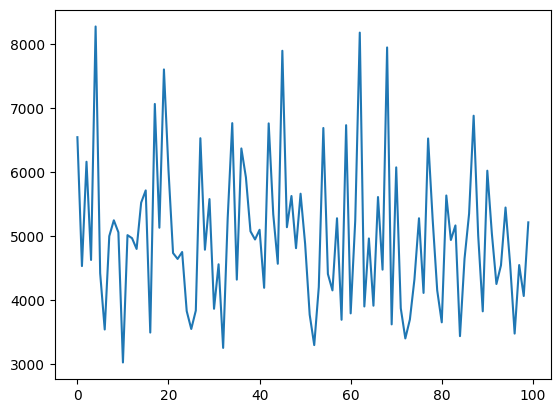

In [13]:
plt.plot(iterations, follow_best_fitness)
plt.show()

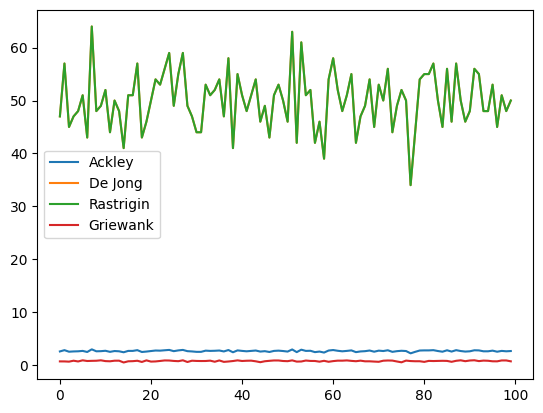

In [14]:
plt.plot(iterations, follow_best_benchmarks_ackley, label="Ackley")
plt.plot(iterations, follow_best_benchmarks_de_jong, label="De Jong")
plt.plot(iterations, follow_best_benchmarks_rastrigin, label="Rastrigin")
plt.plot(iterations, follow_best_benchmarks_griewank, label="Griewank")
plt.legend()
plt.show()

## Follow Best Distinct

In [15]:
from follow_best_distinct import FollowBestDistinctGA

In [16]:
follow_best_distinct_fitness = [-1 for _ in range(iterations_number)]
follow_best_distinct_benchmarks_ackley = [-1 for _ in range(iterations_number)]
follow_best_distinct_benchmarks_de_jong = [-1 for _ in range(iterations_number)]
follow_best_distinct_benchmarks_rastrigin = [-1 for _ in range(iterations_number)]
follow_best_distinct_benchmarks_griewank = [-1 for _ in range(iterations_number)]
for i in range(iterations_number):
    result = run_genetic_algorithm(FollowBestDistinctGA, 0.5, i)
    follow_best_distinct_fitness[i] = result.objectives[0]
    follow_best_distinct_benchmarks_ackley[i] = ackley_benchmark(result.variables[0])
    follow_best_distinct_benchmarks_de_jong[i] = de_jong_benchmark(result.variables[0])
    follow_best_distinct_benchmarks_rastrigin[i] = rastrigin_benchmark(result.variables[0])
    follow_best_distinct_benchmarks_griewank[i] = griewank_benchmark(result.variables[0])

[2024-05-26 23:31:58,262] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:58,276] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:58,376] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:58,377] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:58,378] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:58,379] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:58,389] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:58,459] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:58,460] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:58,461] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:58,463] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:58,474] [jm

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, False, True, True, False, False, False, True, False, True, True, False, False, True, False, True, True, False, True, True, False, True, False, True, False, True, False, True, True, True, False, True, True, False, True, False, True, True, True, False, True, True, True, False, True, True, True, False, False, True, False, True, False, True, False, False, True, True, False, False, True, True, True, True, True, True, False, True, False, False, True, False, True, True, False, True, True, False, True, True, False, False, True, False, False, True, False, True, True, True, True, True, False, False, True, False, False, True, False, False]
Fitness: 6322
Computing time: 0.1159977912902832
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, True, True, True, False, False, True, True, False, False, True, False, True, False, False, True, False, False, True, True, False, False, False, True,

[2024-05-26 23:31:58,620] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:58,621] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:58,621] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:58,622] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:58,632] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:58,696] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:58,697] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:58,697] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:58,699] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:58,711] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:58,777] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:58,778] [jmetal.core.al

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, True, True, True, True, True, True, False, True, False, False, True, True, True, True, False, True, False, False, True, True, False, False, False, False, False, True, True, False, True, False, True, False, False, False, False, False, True, True, True, True, False, False, False, False, False, True, True, True, True, False, True, False, False, True, True, False, True, True, False, False, False, True, False, False, False, True, True, True, True, True, True, False, False, True, False, False, False, True, False, True, False, True, False, True, False, True, True, True, False, False, False, True, False, True, False, True, True, True, False]
Fitness: 4982
Computing time: 0.0769956111907959
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, True, False, False, False, True, False, False, True, False, True, True, True, True, True, True, True, False, False, True, False, True, False, Fa

[2024-05-26 23:31:58,848] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:58,849] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:58,851] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:58,861] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:58,922] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:58,924] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:58,924] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:58,926] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:58,937] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:58,999] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:59,000] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, True, True, True, True, False, False, True, False, True, True, True, True, False, False, True, True, True, False, True, False, False, False, False, False, False, False, True, False, True, False, True, False, True, True, True, True, True, False, False, True, False, True, True, False, True, False, True, False, False, False, True, True, True, True, False, True, True, False, False, False, True, True, True, True, False, True, True, False, True, False, True, False, True, False, False, True, True, True, True, True, True, False, False]
Fitness: 4630
Computing time: 0.07000184059143066
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, False, True, False, False, False, True, False, False, True, True, False, False, False, False, False, True, True, False, False, False, False, False

[2024-05-26 23:31:59,080] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:59,081] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:59,081] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:59,083] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:59,093] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:59,151] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:59,152] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:59,153] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:59,154] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:59,165] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:59,227] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:59,228] [jmetal.core.al

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, False, True, True, True, True, False, True, True, False, True, True, True, True, True, True, False, True, False, False, False, False, False, True, True, True, False, True, True, True, False, False, False, False, True, True, True, True, True, True, False, False, True, False, True, False, True, False, False, True, False, False, True, True, True, True, False, True, True, True, False, False, False, True, False, False, True, True, False, False, True, True, False, False, False, False, True, True, True, False, False, True, True, False, True, False, False, True, True, True, True, True, False, True, True, True, True, False, False, True]
Fitness: 5326
Computing time: 0.0780038833618164
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, False, False, False, False, True, True, True, False, True, False, True, True, True, True, False, True, True, True, True, False, False, True, True, Fal

[2024-05-26 23:31:59,302] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:59,303] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:59,304] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:59,305] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:59,316] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:59,377] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:59,378] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:59,379] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:59,380] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:59,390] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:59,451] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:59,453] [jmetal.core.al

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, True, False, False, False, False, False, True, True, False, False, False, False, True, False, True, True, True, True, True, False, False, False, True, True, False, True, True, False, False, False, True, True, True, False, False, True, True, True, False, False, False, False, True, False, False, True, True, False, False, False, True, False, False, True, True, False, False, False, True, False, False, False, False, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, True]
Fitness: 5726
Computing time: 0.07599949836730957
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, False, False, False, True, False, True, False, True, True, True, True, True, True, True, True, True, True, False, False, False, False, Tr

[2024-05-26 23:31:59,531] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:59,532] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:59,534] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:59,543] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:59,614] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:59,615] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:59,616] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:59,618] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:59,628] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:59,689] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:59,690] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, False, False, False, True, False, True, True, False, False, True, True, True, True, True, False, False, True, True, False, False, False, True, False, True, True, True, True, False, True, True, True, True, True, True, False, False, True, True, True, False, False, True, True, False, True, True, True, False, True, False, False, False, False, False, True, False, True, False, True, True, False, False, True, True, False, False, True, False, True, True, True, True, True, False, False, False, False, True, True, False, False, False, True, True, True, True, True, False, False, False, False, False, True, False, True, True, False, True, False]
Fitness: 3958
Computing time: 0.07697105407714844
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, True, False, False, True, False, False, False, True, True, False, True, True, True, True, False, False, True, False, True, False, False, False, F

[2024-05-26 23:31:59,766] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:59,766] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:59,769] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:59,781] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:59,844] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:59,846] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:31:59,849] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:31:59,850] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:31:59,861] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:31:59,933] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:31:59,935] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, False, True, True, False, True, False, False, True, False, False, True, False, False, False, True, True, False, False, False, True, False, False, False, True, True, False, True, False, True, True, True, False, False, False, True, False, True, True, True, False, True, True, True, False, True, False, True, False, False, True, True, True, True, False, False, True, True, False, False, False, False, True, True, True, False, True, True, False, True, False, False, False, False, False, False, True, True, False, False, True, True, True, True, True, False, True, False, False, False, True, False, True, True, True, False, True, True, False, True]
Fitness: 3938
Computing time: 0.07700562477111816
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, True, True, False, False, False, False, False, False, True, False, False, False, True, False, True, False, False, False, False, False, False, 

[2024-05-26 23:32:00,025] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:00,029] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:00,032] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:00,036] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:00,056] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:00,155] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:00,156] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:00,156] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:00,160] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:00,171] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...


Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, True, False, False, False, True, False, False, True, True, True, False, False, True, False, False, True, False, False, True, False, True, False, True, False, True, True, True, True, False, False, False, True, True, False, False, True, True, True, False, False, True, True, True, True, True, True, False, True, True, False, False, False, True, False, True, True, True, True, False, True, True, True, False, False, True, True, False, True, False, True, False, False, False, False, False, False, False, True, True, True, False, False, False, True, False, True, True, True, False, True, False, True, False, True, True, True, False, True, False]
Fitness: 4414
Computing time: 0.09800076484680176
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, True, True, True, True, False, False, False, False, False, True, False, False, True, True, True, True, True, True, True, True, True, False, True

[2024-05-26 23:32:00,245] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:00,246] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:00,246] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:00,247] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:00,262] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:00,327] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:00,328] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:00,329] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:00,331] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:00,342] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:00,404] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:00,405] [jmetal.core.al

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, True, True, True, True, False, True, True, False, False, True, False, True, False, True, False, True, True, True, False, False, False, True, False, False, True, False, True, False, True, True, False, True, False, True, True, False, True, False, True, False, True, False, False, False, True, False, True, True, True, True, True, True, False, True, False, True, False, True, True, True, False, False, True, True, False, True, False, True, False, True, True, True, True, False, False, False, True, False, True, True, False, True, False, True, False, False, True, True, True, True, True, True, False, True, True, True, True, False, False]
Fitness: 4522
Computing time: 0.08698773384094238
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, False, False, False, True, True, False, True, False, False, True, True, False, True, True, True, False, True, True, True, False, True, True, True, Tru

[2024-05-26 23:32:00,485] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:00,486] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:00,486] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:00,487] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:00,498] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:00,560] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:00,560] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:00,561] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:00,562] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:00,572] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:00,634] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:00,635] [jmetal.core.al

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, False, False, True, False, True, False, True, True, False, True, False, False, False, False, True, False, False, True, False, False, True, False, True, False, True, True, False, True, False, True, True, True, True, False, True, False, False, True, False, False, True, True, True, True, True, False, False, True, True, False, True, True, True, True, False, True, True, False, False, True, False, False, True, True, False, True, True, False, True, True, False, False, True, True, False, False, True, True, False, True, False, False, True, True, True, False, True, False, True, True, False, True, False, False, True, True, False, True, True]
Fitness: 8098
Computing time: 0.0800008773803711
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, True, False, False, False, True, False, True, False, False, True, True, False, False, False, False, False, True, True, False, True, True, True, True

[2024-05-26 23:32:00,709] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:00,710] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:00,711] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:00,712] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:00,722] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:00,781] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:00,782] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:00,782] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:00,783] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:00,793] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:00,852] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:00,853] [jmetal.core.al

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, False, True, True, True, True, True, True, False, True, False, False, True, False, False, False, True, True, True, False, False, False, False, True, True, False, False, False, True, False, True, False, True, True, False, False, True, True, False, False, False, True, True, False, False, True, False, False, False, False, True, True, False, False, True, True, False, False, False, False, False, True, False, False, False, False, True, False, True, False, False, True, False, False, True, True, True, False, True, False, False, True, False, True, True, False, True, False, True, False, True, False, False, True, True, False, False, False, False, False]
Fitness: 4298
Computing time: 0.07400107383728027
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, False, False, False, True, False, False, False, False, False, True, False, True, False, True, True, False, True, False, False, True, Fa

[2024-05-26 23:32:00,924] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:00,925] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:00,928] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:00,938] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:00,998] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:00,999] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:01,001] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:01,002] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:01,012] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:01,070] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:01,072] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, False, True, False, True, False, False, False, False, False, False, True, False, False, True, False, False, False, False, True, False, False, True, False, False, True, False, False, True, True, True, False, True, False, True, False, True, False, True, False, True, False, False, True, True, True, False, True, True, True, False, False, False, True, True, False, True, False, True, False, True, True, True, True, True, False, True, False, True, False, True, True, True, False, False, True, False, False, True, False, False, False, False, True, True, False, True, False, False, True, True, False, True, False, True, False, True, True, False, False]
Fitness: 6302
Computing time: 0.0739603042602539
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, True, False, True, True, True, False, True, False, False, False, False, True, True, False, False, False, False, True, True, False, False, 

[2024-05-26 23:32:01,146] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:01,147] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:01,147] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:01,149] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:01,160] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:01,220] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:01,221] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:01,222] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:01,224] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:01,234] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:01,294] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:01,295] [jmetal.core.al

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, False, True, True, True, True, True, False, True, False, True, True, False, True, True, False, True, False, True, True, False, True, True, True, False, False, True, False, True, False, False, True, True, False, True, False, True, True, True, False, False, False, False, True, True, True, False, True, False, False, True, True, False, True, False, True, True, False, False, True, False, False, False, False, True, False, False, True, False, True, True, False, True, True, True, False, False, False, False, False, True, True, False, False, True, False, True, True, True, True, False, True, False, True, True, False, True, True, True, True]
Fitness: 3854
Computing time: 0.07198929786682129
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, True, True, False, True, True, False, False, False, False, True, True, False, False, False, False, True, True, True, False, True, False, False, True

[2024-05-26 23:32:01,370] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:01,370] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:01,371] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:01,372] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:01,383] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:01,445] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:01,446] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:01,446] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:01,447] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:01,458] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:01,522] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:01,525] [jmetal.core.al

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, False, True, False, False, True, False, True, True, True, True, True, False, True, True, False, False, True, False, True, False, False, True, True, False, True, False, True, True, False, True, False, True, False, False, True, False, True, False, False, True, False, False, False, True, True, True, True, False, True, True, False, True, False, True, True, False, True, False, True, True, True, True, False, False, True, True, False, False, True, False, False, False, True, False, True, True, False, False, False, False, False, True, True, True, True, True, False, True, True, True, False, True, False, False, False, False, False, False, False]
Fitness: 4094
Computing time: 0.0749664306640625
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, True, True, False, False, True, True, True, False, False, False, False, False, False, False, True, False, False, True, True, False, False, Fal

[2024-05-26 23:32:01,601] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:01,602] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:01,603] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:01,605] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:01,617] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:01,680] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:01,681] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:01,682] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:01,683] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:01,697] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:01,762] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:01,763] [jmetal.core.al

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, True, True, True, True, True, False, False, False, False, False, True, False, False, False, True, True, False, True, False, False, False, True, False, False, False, True, False, True, True, False, False, True, True, True, True, False, False, True, True, True, True, False, False, False, False, False, True, False, False, False, True, True, True, True, False, False, True, True, True, True, False, False, True, False, False, True, False, True, False, True, True, True, True, True, False, True, True, False, True, False, True, True, True, True, True, True, False, False, False, True, True, False, True, False, False, True, False, True, False]
Fitness: 5314
Computing time: 0.07599711418151855
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, False, True, False, True, False, False, False, True, False, False, True, False, True, False, False, False, True, True, False, True, False, True, 

[2024-05-26 23:32:01,839] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:01,841] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:01,842] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:01,844] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:01,853] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:01,916] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:01,917] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:01,918] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:01,919] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:01,930] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:01,988] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:01,989] [jmetal.core.al

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, False, False, True, False, True, False, False, True, False, True, False, True, True, False, False, True, True, True, False, False, False, False, True, False, False, False, True, False, False, False, False, False, False, True, False, False, True, False, False, False, True, True, True, True, True, False, True, True, False, False, True, True, False, True, False, False, True, False, False, False, False, False, True, False, True, False, False, True, False, True, True, False, False, False, True, False, True, True, False, True, False, True, True, True, False, False, True, False, False, False, True, False, False, False, True, False, True, True, True]
Fitness: 4182
Computing time: 0.07805466651916504
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, True, True, False, True, False, True, False, True, False, True, False, False, False, True, False, True, True, True, True, False, Fals

[2024-05-26 23:32:02,065] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:02,066] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:02,067] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:02,079] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:02,140] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:02,142] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:02,143] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:02,144] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:02,153] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:02,215] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:02,216] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, True, True, True, False, False, True, True, True, False, True, False, False, False, False, True, True, True, False, True, True, False, False, True, True, True, False, True, False, False, False, False, False, True, True, True, False, False, True, False, True, True, False, False, True, True, False, False, False, False, False, True, False, False, False, True, True, True, False, True, True, True, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, True, False, True, True, False, False, True, False, False, True, True, False, False, True, True, False, False, True, True, False, False, False, False]
Fitness: 6946
Computing time: 0.07499194145202637
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, False, False, False, False, False, True, True, True, False, True, True, True, True, True, False, True, True, True, True, False, False,

[2024-05-26 23:32:02,289] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:02,291] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:02,293] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:02,294] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:02,304] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:02,364] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:02,365] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:02,365] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:02,366] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:02,377] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:02,452] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:02,453] [jmetal.core.al

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, False, False, True, True, False, True, True, True, False, True, True, False, True, True, False, False, False, False, False, False, False, True, True, True, True, True, True, True, False, False, True, False, True, False, True, True, True, True, False, True, False, False, False, False, True, True, True, False, False, True, False, False, False, False, True, False, True, False, True, False, True, True, True, False, False, True, False, False, False, False, False, True, False, False, True, False, False, False, True, True, False, False, False, False, False, True, True, True, True, True, False, True, False, True, False, False, True, True, False]
Fitness: 4122
Computing time: 0.07500219345092773
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, False, True, False, False, True, True, True, False, True, False, True, False, True, False, False, False, True, True, True, False, False, F

[2024-05-26 23:32:02,527] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:02,528] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:02,528] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:02,530] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:02,540] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:02,598] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:02,599] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:02,600] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:02,601] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:02,611] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:02,674] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:02,675] [jmetal.core.al

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, False, True, False, False, True, True, False, False, True, True, True, False, True, True, True, False, True, True, True, True, False, True, False, True, True, False, False, True, False, False, True, True, False, False, True, False, False, False, True, False, False, True, True, False, True, False, True, False, True, False, False, False, True, True, False, False, False, True, False, True, True, True, True, True, True, False, False, False, False, False, True, True, True, True, True, False, True, False, True, True, True, False, True, False, True, True, True, False, True, True, False, True, False, True, True, True, False, False, False]
Fitness: 5974
Computing time: 0.0729978084564209
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, True, True, True, False, False, False, True, False, False, False, False, False, False, True, False, False, True, False, True, True, True, True, Fal

[2024-05-26 23:32:02,751] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:02,752] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:02,752] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:02,753] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:02,764] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:02,827] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:02,828] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:02,829] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:02,830] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:02,840] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:02,900] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:02,901] [jmetal.core.al

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, True, False, False, True, True, True, False, False, False, True, False, False, False, True, False, False, False, True, True, True, False, True, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, False, False, False, True, False, False, True, True, True, False, True, False, True, False, True, True, True, False, True, True, True, False, False, False, True, True, False, True, True, True, True, False, True, False, True, False, False, False, True, True, True, True, True, True, True, False, True, False, True, False, False, True, True, False, False, True, False, False, True, False, False, True]
Fitness: 6878
Computing time: 0.0749971866607666
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, False, False, False, True, False, True, True, True, False, True, False, True, False, True, False, False, True, False, False, True, True, False

[2024-05-26 23:32:02,973] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:02,974] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:02,975] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:02,976] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:02,987] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:03,046] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:03,047] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:03,047] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:03,049] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:03,061] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:03,130] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:03,132] [jmetal.core.al

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, True, True, False, True, True, False, False, False, True, False, False, False, False, False, True, False, False, False, True, True, False, True, True, True, False, True, False, False, True, False, True, False, False, True, False, True, True, True, True, True, False, False, True, True, True, False, True, True, False, False, False, False, True, False, True, True, False, True, False, True, True, False, False, False, True, True, False, True, False, True, True, True, False, False, True, False, False, True, False, True, False, False, True, False, False, True, True, False, False, True, True, True, True, True, False, False, True, True, True]
Fitness: 5006
Computing time: 0.072998046875
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, False, True, False, True, True, False, True, False, False, False, False, True, True, False, True, True, True, False, False, True, False, False, True,

[2024-05-26 23:32:03,204] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:03,205] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:03,206] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:03,207] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:03,216] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:03,275] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:03,276] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:03,277] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:03,278] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:03,289] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:03,349] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:03,350] [jmetal.core.al

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, False, True, False, True, False, False, False, True, True, True, True, True, True, True, False, False, False, True, True, False, True, True, False, False, False, True, False, False, True, True, True, False, False, False, True, True, True, True, True, True, False, True, False, True, False, True, False, False, False, True, False, True, True, False, False, True, True, True, False, True, True, False, True, True, True, True, False, True, False, False, False, True, False, False, True, True, False, False, False, True, False, False, True, True, False, True, True, False, True, False, True, True, True, True, True, False, False, False, True]
Fitness: 5498
Computing time: 0.07299542427062988
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, False, True, True, True, True, True, False, True, True, False, True, False, False, True, True, True, False, False, False, True, True, True, False, 

[2024-05-26 23:32:03,429] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:03,431] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:03,432] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:03,434] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:03,446] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:03,514] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:03,515] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:03,516] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:03,517] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:03,530] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:03,612] [jmetal.core.algorithm] [DEBUG] Initializing progress...


Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, False, True, True, False, True, False, True, True, False, False, True, False, True, True, False, True, True, False, False, False, True, True, False, True, False, False, False, False, True, False, True, True, True, True, False, True, True, False, False, True, True, False, False, True, True, False, True, False, False, True, False, False, True, True, True, False, False, True, False, True, True, True, True, False, True, True, True, False, True, False, True, False, False, False, False, False, False, False, True, False, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, False, True, False, True]
Fitness: 5238
Computing time: 0.07994556427001953
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, True, True, False, False, True, True, True, True, False, True, True, False, True, True, True, True, True, False, True, False, True, True, False, Tr

[2024-05-26 23:32:03,613] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:03,614] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:03,615] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:03,624] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:03,686] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:03,687] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:03,688] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:03,691] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:03,700] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:03,768] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:03,769] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, False, False, False, False, False, True, False, False, False, False, False, True, False, False, True, False, False, True, False, True, True, False, True, False, True, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, True, True, True, False, False, True, True, True, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, True, False, True, True, True, False, True, True, False, True, False, False, False, False, False, True, False, True, True, True, True, False, True, True, False, True, True, True, False, True, True, False, False, False, False]
Fitness: 4678
Computing time: 0.09799885749816895
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, False, False, True, True, True, False, False, True, True, True, False, True, True, False, True, True, False, False, True, True, Fa

[2024-05-26 23:32:03,840] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:03,841] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:03,841] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:03,842] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:03,852] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:03,910] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:03,911] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:03,912] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:03,913] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:03,923] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:03,982] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:03,983] [jmetal.core.al

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, True, False, True, False, True, True, True, False, False, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, False, True, False, True, False, False, False, True, True, True, False, True, True, True, True, True, False, True, True, False, False, False, False, True, False, True, True, False, True, False, False, True, True, True, False, True, True, False, True, True, True, True, False, False, False, False, False, True, False, True, False, True, False, True, True, True, False, True, False, False, False, False, True, False, False, True, True, False, True, False, False, False, True, True]
Fitness: 5378
Computing time: 0.06997871398925781
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, False, True, False, False, True, False, False, False, True, True, True, True, False, False, True, True, False, True, True, True, True, True, False, 

[2024-05-26 23:32:04,056] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:04,057] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:04,058] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:04,059] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:04,068] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:04,129] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:04,130] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:04,130] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:04,131] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:04,142] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:04,205] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:04,206] [jmetal.core.al

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, True, False, False, False, False, False, True, False, True, True, True, True, False, False, True, False, False, False, False, False, True, True, False, False, True, True, False, False, False, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, True, True, True, True, False, True, False, True, True, True, False, False, True, True, True, True, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, True, True, False, False, True, True, True, True, False, True, True, True, False, False, False, True, False, True, False, False, False]
Fitness: 4722
Computing time: 0.07300066947937012
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, False, True, False, False, True, False, False, True, True, True, True, True, True, False, True, False, False, False, True, False, False, True

[2024-05-26 23:32:04,285] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:04,285] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:04,287] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:04,298] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:04,361] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:04,362] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:04,363] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:04,364] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:04,373] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:04,434] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:04,435] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, False, True, True, True, False, True, True, True, False, True, True, True, True, False, False, True, True, False, False, True, False, False, False, False, False, False, False, True, True, True, True, False, False, False, False, False, True, False, False, True, True, True, True, False, False, True, False, True, True, False, True, True, True, True, True, False, False, False, False, True, True, True, False, False, False, False, True, True, True, False, False, False, True, False, True, False, True, False, True, False, True, False, False, False, False, True, False, True, False, False, False, True, True, False, False, True, True, False, False]
Fitness: 4230
Computing time: 0.07800006866455078
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, False, False, False, True, False, True, False, True, False, False, False, True, True, False, True, False, True, True, True, False, False, Tr

[2024-05-26 23:32:04,509] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:04,511] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:04,512] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:04,513] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:04,523] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:04,582] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:04,583] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:04,584] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:04,585] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:04,598] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:04,662] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:04,663] [jmetal.core.al

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, False, True, False, False, False, True, False, True, False, False, True, True, True, False, False, True, False, True, False, False, False, False, True, True, True, False, False, False, True, True, False, True, True, False, False, False, True, False, False, False, True, False, True, False, False, True, True, True, False, False, False, False, False, True, False, False, True, True, True, True, False, True, True, False, True, False, True, False, True, True, False, False, False, True, False, True, False, False, False, False, True, False, False, True, True, True, True, False, True, False, False, True, True, False, False, True, True, True, False]
Fitness: 6034
Computing time: 0.07397985458374023
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, False, False, True, True, True, False, True, True, False, False, True, False, True, False, False, False, True, False, False, True, True, 

[2024-05-26 23:32:04,738] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:04,739] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:04,739] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:04,740] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:04,750] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:04,812] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:04,813] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:04,813] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:04,814] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:04,824] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:04,888] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:04,890] [jmetal.core.al

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, False, True, True, False, True, True, False, True, False, True, True, True, True, False, False, False, False, True, False, False, False, True, True, False, False, True, False, False, True, False, False, True, True, True, False, False, True, True, False, True, True, True, True, False, False, False, True, True, False, True, False, False, False, True, True, False, False, False, False, False, True, True, False, True, False, False, False, False, False, False, True, True, True, False, True, False, False, True, False, False, True, True, True, False, False, False, True, False, False, False, False, False, True, True, False, False, True, True, True]
Fitness: 4486
Computing time: 0.07399606704711914
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, True, True, False, False, True, False, True, True, False, False, False, True, False, False, True, False, True, False, True, False, False, 

[2024-05-26 23:32:04,966] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:04,967] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:04,967] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:04,969] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:04,980] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:05,049] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:05,050] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:05,051] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:05,054] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:05,067] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:05,138] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:05,141] [jmetal.core.al

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, True, False, False, False, False, True, False, True, False, True, True, False, False, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, True, False, True, True, False, False, False, False, True, False, False, False, True, False, False, True, False, False, False, False, True, True, True, True, False, False, False, False, False, True, True, True, False, True, False, True, False, False, True, False, True, True, False, True, True, False, True, True, False, False, True, True, False, False, False, True, True, True, True, False, False, False, True, True, True, False, True, False, True]
Fitness: 4482
Computing time: 0.07500195503234863
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, True, True, True, False, False, True, False, True, True, False, False, True, False, False, False, True, False, False, True, False, F

[2024-05-26 23:32:05,153] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:05,214] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:05,215] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:05,215] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:05,216] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:05,227] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:05,290] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:05,291] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:05,292] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:05,293] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:05,305] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:05,370] [jmetal.core.alg

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, False, False, True, True, True, True, True, True, True, True, False, False, False, False, False, True, False, False, True, False, True, True, True, False, True, False, False, True, False, True, False, True, False, False, True, False, False, False, True, False, False, False, False, True, False, True, False, True, True, False, False, False, False, False, False, False, True, False, False, True, False, False, True, True, False, True, True, True, True, False, False, True, True, True, False, False, True, True, True, False, True, False, False, True, False, False, True, True, False, True, True, True, False, True, False, True, True, False, True]
Fitness: 4970
Computing time: 0.0729978084564209
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, True, True, True, True, True, False, True, True, True, True, False, False, True, True, True, True, False, False, False, True, True, False, Fa

[2024-05-26 23:32:05,452] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:05,452] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:05,455] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:05,467] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:05,531] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:05,532] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:05,532] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:05,533] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:05,545] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:05,608] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:05,609] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, True, False, False, False, False, True, False, False, False, True, True, True, True, False, False, False, True, False, False, False, True, True, False, False, False, True, True, False, False, True, True, False, True, False, False, False, False, False, True, False, False, True, True, True, True, False, True, False, True, False, False, False, False, True, False, False, True, False, True, True, False, True, False, False, False, False, True, True, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, True, True, True, False, False, False, False, False, False, False]
Fitness: 7286
Computing time: 0.08002305030822754
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, True, True, False, True, True, False, False, False, True, False, True, True, False, True, True, True, False, False, True, Fals

[2024-05-26 23:32:05,683] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:05,684] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:05,685] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:05,695] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:05,759] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:05,760] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:05,760] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:05,762] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:05,773] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:05,834] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:05,835] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, True, True, True, True, True, True, False, True, False, False, False, True, True, True, False, True, True, True, True, False, True, False, True, True, True, True, True, False, True, True, False, False, False, True, False, True, True, True, True, True, False, False, True, True, False, True, True, True, False, False, False, True, False, False, False, True, True, False, True, True, True, False, True, True, False, False, True, False, False, True, False, True, True, False, False, True, False, False, True, False, False, True, True, False, True, True, True, False, False, False, False, False, True, True, False, False, True, True, True]
Fitness: 5538
Computing time: 0.07399702072143555
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, True, False, True, False, True, False, True, True, False, True, True, False, False, False, True, True, False, True, True, True, True, True, False, Fa

[2024-05-26 23:32:05,913] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:05,914] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:05,914] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:05,916] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:05,927] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:05,985] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:05,987] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:05,987] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:05,989] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:05,998] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:06,059] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:06,060] [jmetal.core.al

Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [True, True, False, True, True, True, False, True, False, False, False, False, True, False, True, False, True, True, True, False, False, False, False, False, False, False, True, False, True, False, False, True, False, True, False, False, True, True, True, False, False, True, True, False, True, False, False, False, True, False, True, False, True, True, False, True, False, True, True, True, True, False, True, False, False, True, True, False, True, True, True, True, True, False, False, False, True, False, True, True, False, True, False, True, False, False, True, True, False, True, False, False, True, True, False, False, False, True, False, True]
Fitness: 5230
Computing time: 0.07698440551757812
Algorithm: GA with 'Follow Best Distinct' mutation
Problem: LABS
Solution: [False, False, True, True, False, True, True, False, False, True, False, True, True, True, False, False, False, False, True, False, False, True, True

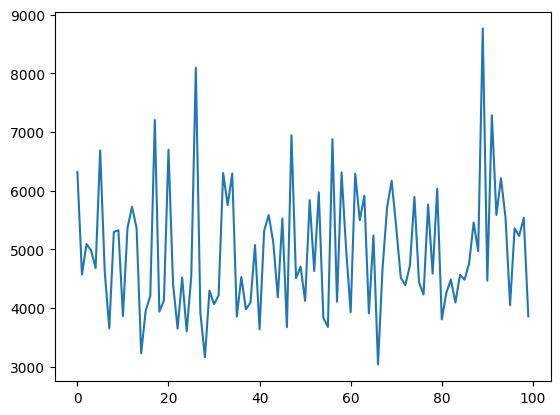

In [17]:
plt.plot(iterations, follow_best_distinct_fitness)
plt.show()

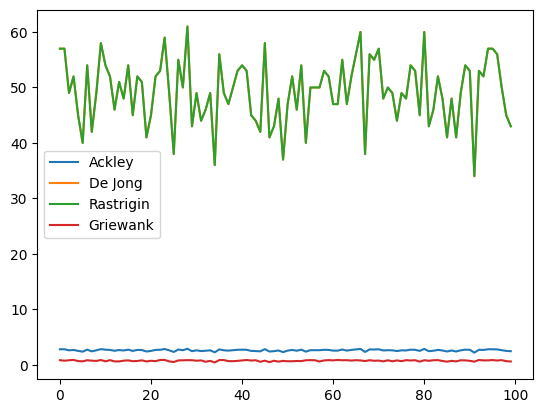

In [18]:
plt.plot(iterations, follow_best_distinct_benchmarks_ackley, label="Ackley")
plt.plot(iterations, follow_best_distinct_benchmarks_de_jong, label="De Jong")
plt.plot(iterations, follow_best_distinct_benchmarks_rastrigin, label="Rastrigin")
plt.plot(iterations, follow_best_distinct_benchmarks_griewank, label="Griewank")
plt.legend()
plt.show()

## Repel Worst Gravity

In [19]:
from repel_worst_gravity import RepelWorstGravity

In [20]:
repel_worst_gravity_fitness = [-1 for _ in range(iterations_number)]
repel_worst_gravity_benchmarks_ackley = [-1 for _ in range(iterations_number)]
repel_worst_gravity_benchmarks_de_jong = [-1 for _ in range(iterations_number)]
repel_worst_gravity_benchmarks_rastrigin = [-1 for _ in range(iterations_number)]
repel_worst_gravity_benchmarks_griewank = [-1 for _ in range(iterations_number)]
for i in range(iterations_number):
    result = run_genetic_algorithm(RepelWorstGravity, 0.5, i)
    repel_worst_gravity_fitness[i] = result.objectives[0]
    repel_worst_gravity_benchmarks_ackley[i] = ackley_benchmark(result.variables[0])
    repel_worst_gravity_benchmarks_de_jong[i] = de_jong_benchmark(result.variables[0])
    repel_worst_gravity_benchmarks_rastrigin[i] = rastrigin_benchmark(result.variables[0])
    repel_worst_gravity_benchmarks_griewank[i] = griewank_benchmark(result.variables[0])

[2024-05-26 23:32:06,482] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:06,495] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:06,574] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:06,575] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:06,576] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:06,577] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:06,593] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:06,677] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:06,678] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:06,679] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:06,680] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:06,691] [jm

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, False, False, False, True, True, False, False, True, True, True, False, True, False, False, True, False, True, True, True, False, True, False, True, False, False, False, True, True, False, True, False, True, False, True, False, False, True, False, True, False, True, False, True, False, False, True, True, True, True, True, True, True, False, False, False, True, False, True, False, False, True, False, False, True, False, False, True, False, True, True, True, True, False, False, False, False, False, True, False, False, True, True, False, True, True, True, True, False, False, True, True, True, False, False, False, False, True, True, False]
Fitness: 5302
Computing time: 0.09499955177307129
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, False, True, True, True, False, False, False, True, False, True, False, False, False, False, False, True, False, False, False, True, False, Fals

[2024-05-26 23:32:06,788] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:06,790] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:06,792] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:06,806] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:06,888] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:06,889] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:06,890] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:06,893] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:06,904] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:06,970] [jmetal.core.algorithm] [DEBUG] Initializing progress...


Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, True, False, True, False, False, True, False, False, True, False, False, False, True, True, False, True, True, False, False, False, True, True, True, False, True, True, False, False, True, False, False, True, True, True, False, True, False, False, True, True, True, False, False, False, False, False, False, True, True, True, False, False, False, True, True, False, False, True, True, True, True, False, False, True, True, True, False, False, False, False, True, True, False, False, True, True, True, False, False, True, False, True, True, False, True, False, True, True, True, True, False, False, True, False, False, True, False, True, False]
Fitness: 5054
Computing time: 0.11099839210510254
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, True, True, True, True, True, True, True, True, True, True, False, False, True, True, False, False, False, True, True, True, False, True, False

[2024-05-26 23:32:06,972] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:06,973] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:06,975] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:06,988] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:07,049] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:07,051] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:07,051] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:07,055] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:07,066] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:07,128] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:07,129] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, False, False, True, False, False, True, True, True, False, True, True, False, False, False, False, False, True, False, False, False, False, False, False, True, False, True, False, False, False, False, False, False, True, False, False, False, False, False, True, False, True, True, False, True, True, True, True, True, True, False, False, False, False, False, False, True, False, True, False, False, False, False, True, False, False, False, True, False, True, True, True, True, False, True, False, True, True, False, False, False, False, False, True, False, False, False, True, True, True, True, False, False, False, True, False, True, False, True, True]
Fitness: 5218
Computing time: 0.08100080490112305
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, True, False, False, False, False, False, True, False, True, True, True, True, False, True, True, False, True, False, False, False, Tr

[2024-05-26 23:32:07,203] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:07,205] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:07,206] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:07,207] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:07,217] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:07,277] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:07,278] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:07,279] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:07,280] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:07,290] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:07,351] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:07,353] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, True, False, True, False, True, False, False, True, True, False, True, True, False, True, True, False, False, False, False, True, False, False, True, True, False, True, False, False, True, True, True, False, False, True, True, True, False, True, False, True, True, True, True, False, False, True, False, True, False, False, False, False, True, False, False, True, False, False, True, False, True, False, False, True, True, False, False, False, False, False, True, False, False, False, True, False, True, True, True, True, True, False, True, True, False, False, False, False, False, True, False, False, False, False, True, False, True, True, True]
Fitness: 4166
Computing time: 0.07600235939025879
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, True, True, False, False, True, True, True, False, False, True, False, False, False, True, True, False, True, False, False, True, False, Fal

[2024-05-26 23:32:07,428] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:07,428] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:07,429] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:07,431] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:07,443] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:07,500] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:07,501] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:07,502] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:07,507] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:07,516] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:07,577] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:07,579] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, True, False, True, True, False, False, False, True, True, False, True, True, False, False, False, True, False, False, True, True, True, False, True, True, False, False, True, True, True, False, False, False, False, False, False, True, False, False, False, False, True, True, False, False, True, False, True, True, True, False, True, True, True, True, False, False, False, True, False, True, True, True, False, False, True, True, False, True, True, False, False, False, False, True, False, False, False, False, False, True, True, False, True, True, False, False, False, True, True, False, True, False, True, False, False, True, True, True, False]
Fitness: 5298
Computing time: 0.0740354061126709
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, False, True, True, False, True, False, True, True, False, True, True, False, True, False, True, False, True, True, True, False, False, False,

[2024-05-26 23:32:07,652] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:07,654] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:07,655] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:07,657] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:07,667] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:07,730] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:07,731] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:07,732] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:07,733] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:07,742] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:07,806] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:07,807] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, True, False, True, False, True, False, False, True, True, True, True, True, True, False, True, True, False, False, False, False, True, False, True, True, False, True, False, True, True, False, True, False, True, False, True, True, True, False, True, False, False, True, True, False, True, False, False, False, False, True, True, True, True, False, False, True, True, True, True, True, False, False, False, False, True, True, False, True, False, False, True, True, False, False, True, True, True, True, False, True, False, True, False, True, False, False, True, True, False, False, True, False, True, True, True, True, False, True, True]
Fitness: 4126
Computing time: 0.07600116729736328
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, False, False, False, True, False, False, True, False, True, True, True, True, True, False, True, True, True, True, False, True, False, True, True, Fa

[2024-05-26 23:32:07,880] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:07,881] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:07,882] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:07,883] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:07,894] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:07,952] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:07,953] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:07,954] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:07,955] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:07,965] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:08,027] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:08,028] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, True, True, True, False, False, True, True, True, False, False, True, True, False, False, True, True, True, True, False, False, True, True, True, True, True, True, True, True, False, False, False, False, True, True, False, True, True, False, True, True, True, True, True, False, True, False, False, False, False, False, False, True, True, False, False, False, True, True, True, True, False, True, True, True, True, False, False, False, True, False, False, True, False, False, True, True, False, False, True, False, False, True, False, False, True, True, False, False, True, False, False, True, True, True, False, False, False, False, False]
Fitness: 4978
Computing time: 0.07497191429138184
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, True, False, False, False, True, False, True, True, False, True, False, False, False, True, False, True, False, True, False, False, False, True, T

[2024-05-26 23:32:08,103] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:08,104] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:08,105] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:08,115] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:08,178] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:08,178] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:08,179] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:08,181] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:08,193] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:08,257] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:08,258] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, False, False, False, True, False, False, False, False, False, True, False, False, False, True, True, True, True, False, True, False, False, True, False, False, True, True, True, False, False, True, True, False, False, False, True, True, False, False, True, False, False, True, True, False, False, True, False, True, True, False, True, True, False, False, False, False, True, True, True, False, True, False, False, False, True, True, True, False, True, True, False, True, True, True, False, False, False, True, True, False, False, True, False, False, False, False, False, False, False, True, False, False, False, True, True, False, False, True, False]
Fitness: 6150
Computing time: 0.07500052452087402
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, True, True, False, False, True, True, True, True, False, False, False, True, True, False, True, True, False, False, True, True, False, 

[2024-05-26 23:32:08,330] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:08,331] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:08,331] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:08,333] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:08,344] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:08,403] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:08,405] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:08,405] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:08,407] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:08,418] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:08,487] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:08,488] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, True, False, False, True, True, True, True, False, False, True, True, True, True, False, False, False, False, True, True, True, False, True, True, False, False, True, False, False, True, True, True, False, True, True, False, False, True, False, False, True, False, True, False, True, False, True, True, True, False, False, False, False, True, False, False, False, True, False, False, False, False, True, True, True, True, True, False, False, False, True, False, False, True, False, True, False, True, True, False, True, True, False, False, False, True, True, True, True, False, True, False, True, False, True, False, True, False, False, True]
Fitness: 4794
Computing time: 0.07199835777282715
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, True, False, True, True, False, True, False, True, False, False, False, True, True, True, False, True, False, True, True, True, True, False, Tru

[2024-05-26 23:32:08,569] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:08,570] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:08,571] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:08,572] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:08,583] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:08,655] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:08,656] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:08,657] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:08,659] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:08,668] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:08,729] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:08,731] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, False, True, False, True, True, False, False, True, True, True, False, False, True, True, False, True, False, False, False, True, False, False, False, True, True, False, True, True, True, True, True, False, False, True, False, True, True, False, True, False, False, True, True, True, False, True, False, False, False, False, True, False, False, True, False, True, True, True, False, True, False, True, False, False, False, False, True, True, True, True, True, True, True, True, False, True, False, True, False, True, False, True, False, False, True, False, True, True, True, False, True, False, True, True, False, True, True, True, True]
Fitness: 5494
Computing time: 0.08199954032897949
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, True, True, False, True, True, True, False, True, False, False, True, True, True, True, True, False, True, False, True, False, True, False, False, Tr

[2024-05-26 23:32:08,801] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:08,802] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:08,803] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:08,804] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:08,814] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:08,870] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:08,871] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:08,872] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:08,874] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:08,883] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:08,944] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:08,945] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, True, False, True, True, False, False, True, False, True, True, True, False, True, False, True, True, True, True, True, True, False, True, False, False, False, False, False, False, True, True, True, False, True, True, False, True, True, True, True, True, False, False, False, False, False, False, False, True, True, True, True, True, True, False, True, False, False, True, True, True, True, False, True, True, False, False, False, False, True, True, False, False, False, True, False, True, False, True, False, True, True, True, True, True, False, True, False, True, True, True, True, False, False, False, False, True, True, False, False]
Fitness: 5114
Computing time: 0.06999850273132324
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, False, False, False, True, True, False, True, True, False, False, True, False, True, True, False, True, False, False, False, True, True, True, False

[2024-05-26 23:32:09,021] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:09,023] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:09,024] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:09,026] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:09,038] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:09,096] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:09,098] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:09,099] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:09,101] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:09,113] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:09,176] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:09,177] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, False, False, True, False, True, True, True, True, False, False, False, True, False, False, False, True, False, False, True, True, True, False, False, True, True, False, False, True, True, False, True, True, False, False, True, True, False, True, True, True, True, True, False, False, False, True, False, True, True, True, True, False, True, False, True, True, True, False, True, True, False, True, False, False, True, False, False, False, False, True, True, True, False, True, False, True, False, True, False, False, False, False, True, False, False, False, False, True, False, True, False, False, True, True, False, True, True, True, True]
Fitness: 2542
Computing time: 0.07800459861755371
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, False, False, True, False, True, True, True, True, False, True, True, True, False, False, True, False, False, False, True, True, True, True, False

[2024-05-26 23:32:09,252] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:09,254] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:09,255] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:09,256] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:09,266] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:09,328] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:09,330] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:09,331] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:09,332] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:09,343] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:09,404] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:09,406] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, False, True, True, True, False, False, True, False, True, True, True, True, True, False, False, False, True, False, True, True, True, False, True, False, True, True, True, False, False, False, False, True, True, False, True, True, False, False, False, True, False, True, False, True, False, True, False, True, True, False, True, True, True, False, False, True, True, False, False, True, True, False, False, True, True, True, True, True, True, True, True, True, False, False, True, False, False, False, False, True, True, False, False, True, True, False, True, False, False, True, False, False, False, True, True, False, False, True, True]
Fitness: 4426
Computing time: 0.07700300216674805
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, True, True, False, False, False, True, False, True, True, False, True, False, True, True, True, True, True, False, True, True, True, True, True, Fal

[2024-05-26 23:32:09,478] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:09,479] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:09,480] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:09,493] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:09,555] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:09,556] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:09,556] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:09,557] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:09,567] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:09,627] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:09,628] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, True, True, True, False, True, True, False, True, True, False, True, True, True, True, True, True, False, True, True, True, False, False, False, True, True, False, True, False, True, True, True, True, False, False, False, False, True, True, False, True, True, False, False, False, True, True, False, True, False, False, False, True, True, True, True, False, True, False, True, False, False, True, True, False, True, True, True, False, True, True, False, False, False, True, False, False, True, True, True, False, False, True, False, True, True, False, True, True, False, False, True, True, False, False, False, True, False, False, True]
Fitness: 6166
Computing time: 0.07200169563293457
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, True, False, True, True, True, False, False, False, True, False, True, True, False, True, True, True, False, True, True, True, True, False, False, Fal

[2024-05-26 23:32:09,706] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:09,708] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:09,709] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:09,713] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:09,726] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:09,787] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:09,788] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:09,789] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:09,790] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:09,800] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:09,865] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:09,868] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, False, False, False, True, False, True, False, False, False, False, False, False, False, True, False, False, False, True, True, False, False, False, False, False, True, True, False, True, False, True, False, False, True, False, True, True, False, False, False, False, True, True, True, False, False, False, False, True, True, False, True, True, True, True, True, True, False, False, True, True, False, True, False, True, True, True, True, True, True, False, False, True, True, False, False, True, True, False, True, False, True, True, False, False, False, True, True, False, True, True, False, True, False, False, False, False, False, False, True]
Fitness: 4610
Computing time: 0.08301591873168945
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, False, True, True, False, False, False, False, False, True, True, False, False, False, False, False, False, True, False, False, False, Fals

[2024-05-26 23:32:09,946] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:09,947] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:09,948] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:09,958] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:10,017] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:10,018] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:10,018] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:10,019] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:10,033] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:10,094] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:10,095] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, False, False, False, False, True, False, True, False, True, False, False, False, True, True, True, True, True, False, True, True, True, False, True, False, False, True, False, True, True, False, True, True, False, False, False, False, False, True, True, True, False, True, True, True, True, False, False, True, True, True, False, True, False, True, True, True, True, False, True, False, False, False, False, False, False, False, False, True, False, False, True, True, False, True, False, True, True, False, False, True, True, False, True, False, False, True, True, False, True, True, True, True, False, True, True, False, True, True, True]
Fitness: 3430
Computing time: 0.07599711418151855
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, False, True, False, True, False, True, False, True, False, True, True, True, True, False, False, False, False, True, False, False, True, True, False

[2024-05-26 23:32:10,167] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:10,168] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:10,170] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:10,179] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:10,242] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:10,244] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:10,245] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:10,246] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:10,259] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:10,319] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:10,321] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, True, False, True, True, True, False, False, False, False, False, True, True, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, True, False, True, False, True, True, False, True, True, False, True, False, False, False, True, True, False, False, True, False, True, False, True, False, False, True, False, False, False, False, True, True, True, False, True, True, True, True, True, True, True, True, True, False, False, False, True, False, True, False, False, True, False, True, True, True, False, True, True, True, False, False, False, True, False, False, False, False, True, True, True]
Fitness: 5458
Computing time: 0.07100772857666016
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, False, True, False, True, False, False, False, True, True, True, True, True, True, False, False, False, False, False, True, True, False, Fal

[2024-05-26 23:32:10,393] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:10,394] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:10,396] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:10,406] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:10,467] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:10,468] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:10,469] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:10,471] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:10,481] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:10,544] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:10,545] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, False, True, True, False, False, False, True, True, False, True, False, True, False, True, False, False, False, True, False, False, False, True, True, False, False, True, False, True, True, False, False, True, False, False, True, True, False, False, False, False, False, False, False, True, True, False, True, False, True, True, False, False, True, False, False, False, False, False, True, False, True, False, False, False, False, True, True, True, True, True, True, True, True, False, False, True, False, True, True, True, False, False, False, True, True, True, True, True, False, False, True, False, True, True, True, True, False, False, False]
Fitness: 4210
Computing time: 0.0720057487487793
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, True, True, True, False, False, True, True, True, False, True, False, False, False, True, False, True, True, False, False, False, True, True, 

[2024-05-26 23:32:10,623] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:10,624] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:10,625] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:10,626] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:10,639] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:10,703] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:10,704] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:10,705] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:10,706] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:10,715] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:10,776] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:10,777] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, True, True, False, False, False, False, False, False, False, True, True, True, False, True, True, True, False, True, True, False, True, True, False, False, True, True, False, False, False, True, True, True, True, True, True, False, False, True, False, False, False, False, True, True, True, True, True, True, True, True, False, True, True, True, False, False, False, True, True, False, False, True, True, True, True, True, False, True, False, True, False, True, True, True, True, False, True, True, True, True, False]
Fitness: 6494
Computing time: 0.07700347900390625
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, False, True, True, True, False, True, True, True, True, True, True, True, False, False, False, False, False, False, True, False, False, False, Tr

[2024-05-26 23:32:10,851] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:10,852] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:10,852] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:10,853] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:10,862] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:10,921] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:10,922] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:10,923] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:10,924] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:10,934] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:10,993] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:10,994] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, False, False, True, True, True, False, False, False, False, True, False, False, True, True, False, False, False, True, True, False, True, True, False, True, False, False, False, True, True, False, False, True, True, False, True, False, True, False, False, True, False, False, False, False, False, False, True, True, True, True, True, False, True, False, False, False, False, True, True, True, False, True, False, False, False, True, False, True, False, False, True, True, False, True, True, False, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, True, False, True, False, False, True, False, False]
Fitness: 3350
Computing time: 0.0729987621307373
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, False, False, False, False, True, False, False, True, False, True, True, True, False, True, False, True, False, False, False, True, False, 

[2024-05-26 23:32:11,075] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:11,077] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:11,078] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:11,089] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:11,148] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:11,149] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:11,151] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:11,152] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:11,167] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:11,227] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:11,228] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, False, True, True, True, True, False, False, False, False, True, False, True, True, False, True, True, True, False, True, False, True, True, False, True, True, True, True, False, True, True, False, False, True, True, True, False, True, True, True, True, False, True, False, True, False, False, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, False, False, True, False, False, True, False, True, False, True, False, True, True, True, False, True, False, False, False, True, False, True, False, False, True, True, False, True, True, False, True, True, True, False, False, True, True]
Fitness: 4298
Computing time: 0.0820000171661377
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, False, True, True, True, False, True, False, False, True, False, True, False, False, True, False, True, False, False, False, False, False, False, True, Fal

[2024-05-26 23:32:11,304] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:11,305] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:11,306] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:11,316] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:11,377] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:11,379] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:11,380] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:11,382] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:11,392] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:11,456] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:11,457] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, False, True, False, True, True, False, False, True, False, False, True, True, True, True, False, True, False, True, True, False, False, False, False, False, True, True, False, True, True, True, True, False, False, True, True, False, True, True, True, False, False, False, True, False, True, True, False, True, True, True, True, False, False, True, False, True, True, True, False, False, False, False, False, False, False, True, False, False, True, True, False, True, False, False, False, False, True, False, False, True, False, False, True, True, True, False, True, False, False, False, True, True, True, False, True, False, False, True, True]
Fitness: 5726
Computing time: 0.0749979019165039
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, True, True, True, True, True, False, True, True, True, True, False, True, True, True, False, False, False, False, False, False, True, False, Fal

[2024-05-26 23:32:11,553] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:11,554] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:11,555] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:11,556] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:11,567] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:11,631] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:11,633] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:11,634] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:11,635] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:11,646] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:11,705] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:11,706] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, False, False, False, True, True, False, True, False, True, True, False, True, False, False, False, True, False, True, False, False, True, False, True, True, True, False, True, True, False, True, False, True, True, False, False, False, False, True, False, True, False, True, False, True, False, True, False, True, False, True, True, True, False, False, True, True, True, True, False, True, True, True, True, True, False, False, False, False, False, False, True, True, False, False, True, True, False, False, True, False, True, True, True, False, True, True, True, False, False, True, True, True, True, True, True, True, False, False, True]
Fitness: 4306
Computing time: 0.09599494934082031
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, True, True, False, True, False, True, True, False, True, False, True, True, False, True, True, False, True, True, False, False, False, True, False, 

[2024-05-26 23:32:11,781] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:11,782] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:11,782] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:11,784] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:11,793] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:11,855] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:11,856] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:11,857] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:11,858] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:11,867] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:11,929] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:11,931] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, True, False, False, True, True, False, False, True, False, False, True, False, True, True, True, False, True, True, True, False, False, False, False, True, True, False, False, False, False, True, False, False, True, True, False, False, True, True, False, False, True, False, True, True, True, True, False, True, True, False, False, True, True, False, True, False, False, False, True, True, True, True, True, False, True, False, True, False, False, True, False, True, True, True, False, True, True, False, True, True, True, True, False, False, True, False, True, True, False, False, True, False, False, False, False, True, True, True, False]
Fitness: 4126
Computing time: 0.07400012016296387
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, False, False, True, False, True, False, False, True, True, True, False, True, False, False, False, True, False, True, True, False, True, True, Tru

[2024-05-26 23:32:12,007] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:12,008] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:12,009] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:12,011] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:12,023] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:12,084] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:12,085] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:12,085] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:12,087] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:12,096] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:12,161] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:12,162] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, True, True, False, True, True, True, True, True, False, False, False, False, False, False, True, True, False, False, True, True, False, False, True, True, True, False, True, True, True, True, False, False, False, False, False, True, True, True, False, True, True, False, True, True, True, False, False, False, True, False, True, True, False, False, False, True, True, False, True, True, False, False, True, True, False, False, True, False, False, True, False, False, True, False, True, True, False, False, False, True, True, False, True, True, False, True, True, False, False, False, True, False, True, True, True, True, True, False, True]
Fitness: 6046
Computing time: 0.07599973678588867
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, True, True, True, False, False, False, True, False, True, True, True, True, False, True, True, True, True, False, True, False, False, False, True, F

[2024-05-26 23:32:12,239] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:12,239] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:12,240] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:12,250] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:12,310] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:12,311] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:12,312] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:12,313] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:12,322] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:12,380] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:12,381] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, False, True, True, False, True, False, True, True, True, False, False, False, False, True, True, True, True, False, False, False, False, False, False, True, True, True, True, True, True, False, True, False, False, True, False, True, False, True, False, True, True, True, True, False, False, True, False, False, True, False, False, True, True, False, True, True, True, True, True, False, True, True, False, True, False, True, True, False, True, False, False, True, True, False, False, False, True, False, False, False, True, False, True, False, True, False, True, False, False, False, False, False, True, False, True, True, True, True, True]
Fitness: 4414
Computing time: 0.07599878311157227
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, True, True, True, True, True, True, True, True, True, False, False, False, False, True, False, False, True, False, False, False, False, True, Fals

[2024-05-26 23:32:12,455] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:12,456] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:12,457] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:12,466] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:12,525] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:12,526] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:12,526] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:12,527] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:12,537] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:12,598] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:12,599] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, True, False, True, True, False, False, False, True, True, True, False, True, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, True, True, False, True, False, True, False, True, True, True, True, True, True, False, False, False, True, True, True, True, False, True, True, True, True, True, False, False, True, False, True, False, True, False, True, True, False, False, True, True, False, True, False, False, True, False, False, False, True, False, False, False, True, True, True, False, False, True, False, True, True, True, True, True, False, True, False, True, True, True, True, True]
Fitness: 5918
Computing time: 0.0720064640045166
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, True, True, True, False, False, True, True, True, True, True, True, True, False, True, False, False, False, True, True, True, True, True, True, True,

[2024-05-26 23:32:12,666] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:12,666] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:12,667] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:12,668] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:12,677] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:12,734] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:12,736] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:12,736] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:12,739] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:12,749] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:12,807] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:12,808] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, False, False, False, True, True, False, True, False, False, False, False, False, True, False, False, False, True, False, False, True, True, True, False, True, False, False, False, True, False, True, False, False, False, False, True, False, True, False, False, False, True, False, False, True, True, True, False, False, True, True, False, True, False, False, False, False, True, False, True, False, True, True, False, False, True, True, True, False, False, True, True, False, False, False, False, False, False, True, True, True, False, False, False, True, True, True, True, False, True, False, True, True, False, False, True, False, False, False, False]
Fitness: 6482
Computing time: 0.06799983978271484
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, True, False, True, False, True, True, False, False, True, True, False, False, False, True, False, True, False, False, False, True, Fal

[2024-05-26 23:32:12,880] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:12,881] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:12,882] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:12,884] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:12,894] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:12,953] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:12,954] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:12,954] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:12,955] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:12,965] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:13,023] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:13,024] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, True, False, False, True, True, False, False, True, True, True, False, True, False, True, False, False, False, True, True, False, False, False, True, False, True, True, False, True, False, False, True, True, False, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, True, True, False, True, False, True, True, True, False, False, True, True, True, True, True, True, False, False, False, False, False, True, True, True, False, False, True, True, False, False, False, False, True, True, True, False, False, True, True, True, True, True, False, True, True, False]
Fitness: 4566
Computing time: 0.07499980926513672
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, False, False, False, True, True, True, False, False, False, False, False, True, True, True, True, True, True, False, True, False, True, True, True

[2024-05-26 23:32:13,096] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:13,096] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:13,097] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:13,099] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:13,109] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:13,168] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:13,169] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:13,170] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:13,171] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:13,181] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:13,239] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:13,240] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, True, True, False, False, False, False, True, True, True, True, True, False, False, False, False, False, False, True, True, True, False, True, True, False, True, True, False, True, True, False, False, True, False, False, True, True, False, False, False, False, True, True, False, True, False, False, False, True, False, True, False, True, True, False, False, True, True, True, True, True, False, False, True, True, False, True, True, True, False, False, True, False, True, False, False, False, False, True, True, False, False, True, False, False, False, True, True, False, False, True, False, False, False, False, True, True, False, False, True]
Fitness: 3506
Computing time: 0.07200264930725098
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, False, True, True, False, False, False, True, True, False, True, False, False, False, True, False, False, False, False, True, True, True, Fa

[2024-05-26 23:32:13,314] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:13,315] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:13,317] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:13,319] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:13,328] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:13,387] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:13,388] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:13,389] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:13,390] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:13,401] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:13,460] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:13,461] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, False, False, False, True, False, True, False, False, True, True, True, False, True, True, False, False, False, True, False, False, True, False, False, False, False, True, False, True, True, True, False, True, False, False, False, False, True, True, False, True, False, True, False, True, False, True, True, False, False, False, False, True, False, False, False, False, False, True, True, True, True, True, False, True, True, True, True, False, True, False, False, False, False, True, False, False, False, True, False, False, True, False, False, False, False, True, False, True, True, True, False, True, True, False, True, False, False, False, True]
Fitness: 5606
Computing time: 0.07500100135803223
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, True, False, False, True, False, False, True, True, True, False, True, False, False, False, True, False, True, True, False, False, False,

[2024-05-26 23:32:13,534] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:13,535] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:13,535] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:13,536] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:13,547] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:13,605] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:13,605] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:13,606] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:13,607] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:13,617] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:13,678] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:13,680] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, False, True, False, True, True, False, True, False, False, False, False, False, False, False, True, False, True, True, False, True, False, True, False, True, False, True, False, True, True, False, True, True, False, True, True, True, True, False, True, False, True, True, False, False, False, False, True, False, False, False, False, False, True, True, False, True, True, False, True, True, False, False, False, False, False, True, False, True, True, True, False, True, False, True, False, False, False, True, False, True, True, False, False, True, True, False, True, False, False, True, False, False, True, True, True, True, True, True, False]
Fitness: 5954
Computing time: 0.0729970932006836
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, True, True, True, True, True, True, False, False, True, False, True, True, False, False, True, True, False, True, False, True, True, True, True

[2024-05-26 23:32:13,753] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:13,754] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:13,755] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:13,756] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:13,766] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:13,822] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:13,823] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:13,823] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:13,824] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:13,834] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:13,894] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:13,895] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, False, True, False, True, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, False, False, False, True, True, False, False, True, True, True, False, False, True, False, False, False, False, True, True, True, False, False, False, False, True, False, True, True, False, False, False, True, False, True, False, False, True, True, False, True, True, False, True, True, False, True, True, False, False, True, False, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, False, True]
Fitness: 8018
Computing time: 0.07199859619140625
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, True, True, False, False, False, True, False, True, True, True, True, False, False, False, False, True, False, False, True, True, False, False, True, True, F

[2024-05-26 23:32:13,967] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:13,968] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:13,969] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:13,978] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:14,039] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:14,041] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:14,041] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:14,042] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:14,052] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:14,112] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:14,114] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [False, True, False, True, False, False, False, False, False, False, True, True, False, True, False, False, False, True, False, True, True, True, True, True, False, True, False, False, False, False, False, True, True, True, True, True, False, False, True, True, True, False, True, False, True, True, True, False, False, True, False, True, True, False, False, False, False, True, True, False, False, False, False, True, False, True, False, True, True, False, True, True, False, True, True, True, True, False, False, True, False, False, True, True, False, True, False, False, True, True, True, True, False, True, False, False, False, True, False, False]
Fitness: 3650
Computing time: 0.07199668884277344
Algorithm: GA with 'Repel Worst Gravity' mutation
Problem: LABS
Solution: [True, True, False, True, True, False, False, True, False, True, True, True, True, True, True, True, True, True, True, False, False, False, True, True

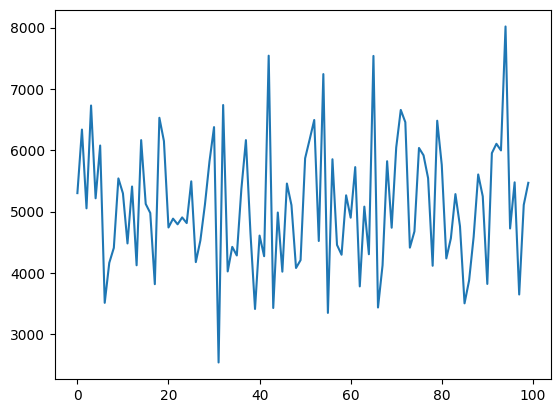

In [21]:
plt.plot(iterations, repel_worst_gravity_fitness)
plt.show()

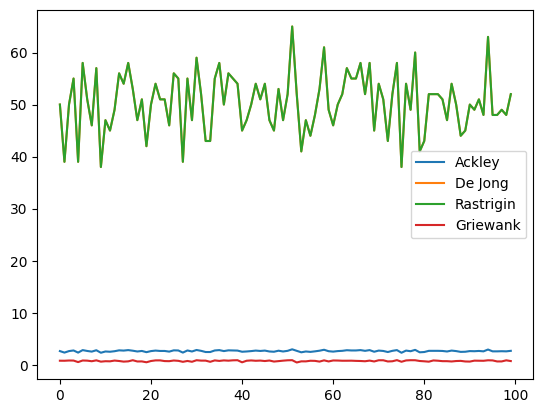

In [22]:
plt.plot(iterations, repel_worst_gravity_benchmarks_ackley, label="Ackley")
plt.plot(iterations, repel_worst_gravity_benchmarks_de_jong, label="De Jong")
plt.plot(iterations, repel_worst_gravity_benchmarks_rastrigin, label="Rastrigin")
plt.plot(iterations, repel_worst_gravity_benchmarks_griewank, label="Griewank")
plt.legend()
plt.show()

## Repel Worst Gravity Multistep

In [23]:
from repel_worst_gravity_multistep import RepelWorstGravityMultistep

In [24]:
repel_worst_gravity_multistep_fitness = [-1 for _ in range(iterations_number)]
repel_worst_gravity_multistep_benchmarks_ackley = [-1 for _ in range(iterations_number)]
repel_worst_gravity_multistep_benchmarks_de_jong = [-1 for _ in range(iterations_number)]
repel_worst_gravity_multistep_benchmarks_rastrigin = [-1 for _ in range(iterations_number)]
repel_worst_gravity_multistep_benchmarks_griewank = [-1 for _ in range(iterations_number)]
for i in range(iterations_number):
    result = run_genetic_algorithm(RepelWorstGravityMultistep, 0.5, i)
    repel_worst_gravity_multistep_fitness[i] = result.objectives[0]
    repel_worst_gravity_multistep_benchmarks_ackley[i] = ackley_benchmark(result.variables[0])
    repel_worst_gravity_multistep_benchmarks_de_jong[i] = de_jong_benchmark(result.variables[0])
    repel_worst_gravity_multistep_benchmarks_rastrigin[i] = rastrigin_benchmark(result.variables[0])
    repel_worst_gravity_multistep_benchmarks_griewank[i] = griewank_benchmark(result.variables[0])

[2024-05-26 23:32:14,468] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:14,482] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:14,552] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:14,554] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:14,555] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:14,557] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:14,570] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:14,653] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:14,654] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:14,655] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:14,656] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:14,673] [jm

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, False, True, True, False, False, True, False, True, True, False, False, False, False, False, False, False, True, False, True, True, False, False, False, False, True, False, False, True, True, False, False, False, True, True, True, False, False, True, True, True, True, True, False, True, True, False, True, True, True, False, True, False, True, False, False, True, True, False, False, True, True, False, False, False, True, True, True, True, False, False, False, False, True, False, True, True, False, True, True, False, True, False, True, False, True, False, False, True, False, False, False, False, True, False, False, False, False, True, False]
Fitness: 4442
Computing time: 0.08799958229064941
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, False, False, True, True, True, False, False, True, False, False, False, False, False, False, True, False, False, True,

[2024-05-26 23:32:14,769] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:14,770] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:14,771] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:14,774] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:14,787] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:14,858] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:14,859] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:14,860] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:14,861] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:14,872] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:14,934] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:14,935] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, True, True, False, True, True, False, True, True, False, False, False, True, True, True, True, True, True, False, True, False, True, True, True, False, True, False, False, True, False, False, False, False, True, True, True, False, False, True, False, False, False, True, False, False, False, False, False, True, True, False, True, True, False, False, True, True, False, False, True, True, False, True, False, True, False, True, True, True, False, False, False, True, True, True, False, True, True, True, True, True, True, False, True, False, False, True, False, True, True, False, False, True, False, False, True, False, False, True, False]
Fitness: 4214
Computing time: 0.11600255966186523
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, False, False, True, False, False, False, True, False, False, True, False, True, False, True, False, True, False, True, True, T

[2024-05-26 23:32:15,011] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:15,012] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:15,014] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:15,024] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:15,086] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:15,087] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:15,087] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:15,088] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:15,098] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:15,159] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:15,164] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, False, False, True, False, True, True, False, True, True, True, True, True, True, False, True, True, False, True, False, True, True, True, True, False, True, False, True, True, False, False, False, True, False, False, True, False, True, True, True, False, True, False, True, True, False, False, False, True, False, False, False, True, False, False, True, True, True, False, False, False, True, False, False, False, False, True, False, False, False, False, True, False, False, False, False, False, True, False, True, False, True, True, False, True, True, False, False, False, False, True, True, True, True, False, True, False, True, False, False]
Fitness: 4182
Computing time: 0.07700371742248535
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, False, True, False, False, False, True, False, False, False, True, False, True, False, True, False, True, False, False, F

[2024-05-26 23:32:15,237] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:15,237] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:15,238] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:15,239] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:15,249] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:15,306] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:15,307] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:15,308] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:15,309] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:15,319] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:15,377] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:15,378] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, False, False, False, False, False, True, True, True, False, False, True, True, True, True, True, False, False, False, False, False, True, True, True, True, False, True, True, False, True, False, False, False, True, True, False, True, False, False, True, True, False, False, True, False, False, True, True, False, True, False, False, False, True, False, True, True, False, False, False, False, True, True, False, False, True, False, False, False, False, True, True, False, True, False, False, False, False, False, False, True, False, True, True, True, True, True, False, True, False, True, False, False, False, True, True, True, True, True, False]
Fitness: 5658
Computing time: 0.07199931144714355
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, False, False, True, False, True, True, True, True, False, False, False, True, False, False, False, False, False, True, F

[2024-05-26 23:32:15,450] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:15,452] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:15,452] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:15,453] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:15,463] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:15,523] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:15,524] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:15,525] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:15,527] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:15,538] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:15,596] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:15,596] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, True, True, False, False, False, False, True, True, True, True, False, False, False, False, False, True, False, True, True, True, True, False, True, True, False, True, False, False, True, False, True, False, False, False, False, False, True, True, True, False, False, False, True, False, True, False, False, True, True, True, True, True, True, False, True, False, False, True, False, True, True, False, True, False, False, True, False, True, False, False, True, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, True, True, True, True, False, False, True, True, True, False]
Fitness: 7206
Computing time: 0.07199716567993164
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, False, False, True, True, False, False, False, True, False, False, False, True, False, False, True, False, True, True,

[2024-05-26 23:32:15,667] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:15,668] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:15,669] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:15,679] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:15,736] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:15,737] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:15,738] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:15,740] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:15,749] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:15,810] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:15,813] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, False, True, True, True, False, True, False, False, False, False, False, True, True, True, True, False, False, True, True, True, True, False, False, True, True, True, False, True, True, False, True, True, False, False, False, False, True, True, False, False, False, True, True, True, False, False, False, False, True, True, False, False, True, True, True, True, True, True, False, False, True, False, False, True, True, True, False, False, False, False, True, False, False, True, False, True, False, True, False, True, False, True, True, True, True, False, True, False, False, False, False, True, False, False, True, True, True, False, True]
Fitness: 4346
Computing time: 0.07099604606628418
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, False, True, True, False, False, False, True, True, False, False, False, False, False, True, False, True, False, True, False,

[2024-05-26 23:32:15,889] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:15,890] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:15,890] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:15,892] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:15,903] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:15,961] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:15,962] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:15,963] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:15,964] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:15,974] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:16,032] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:16,033] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, False, True, True, True, False, False, False, False, True, True, True, True, False, False, False, True, True, False, True, False, False, False, False, False, False, False, True, True, False, True, True, False, True, False, False, True, True, False, True, False, True, True, True, True, True, True, False, False, False, False, True, True, False, False, True, True, True, False, True, False, True, True, True, True, True, False, False, False, True, False, True, True, True, True, False, False, True, False, True, True, False, False, True, False, True, False, False, False, True, True, False, False, True, False, True, True, True, True, False]
Fitness: 5414
Computing time: 0.07700181007385254
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, True, False, True, False, False, False, True, True, True, False, True, False, False, False, True, False, False, False, False,

[2024-05-26 23:32:16,102] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:16,103] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:16,104] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:16,106] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:16,117] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:16,175] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:16,176] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:16,178] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:16,179] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:16,189] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:16,253] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:16,254] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, True, False, False, False, True, False, True, True, False, True, True, True, False, True, True, True, True, True, False, False, True, False, False, True, True, False, False, False, True, False, False, True, False, False, True, False, False, False, True, False, True, True, True, False, True, True, True, True, True, False, False, True, True, True, True, True, False, False, False, False, True, False, True, False, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, False, True, False, True, False, True, True, True, True, False, False, True, True, True]
Fitness: 6434
Computing time: 0.06999945640563965
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, True, False, False, True, True, False, False, True, True, False, True, True, False, True, False, False, False, True, False, True, False

[2024-05-26 23:32:16,326] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:16,327] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:16,328] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:16,329] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:16,341] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:16,401] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:16,402] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:16,403] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:16,404] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:16,415] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:16,475] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:16,476] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, True, True, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, False, True, False, True, False, True, True, False, True, True, True, True, False, True, True, True, False, True, True, True, True, False, True, True, False, True, False, True, False, True, False, True, False, True, False, False, False, True, True, True, False, True, True, True, True, False, True, True, False, True, True, False, True, False, False, False, True, False, True, False, False, True, True, False, False, False, True, True, True, False, False, True, False, True, True, True, True, True, False, True, True]
Fitness: 4222
Computing time: 0.07298064231872559
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, True, False, True, True, False, True, False, True, False, False, True, True, True, False, False, False, False, True, True, True, Tru

[2024-05-26 23:32:16,549] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:16,550] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:16,550] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:16,552] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:16,561] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:16,621] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:16,621] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:16,622] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:16,623] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:16,633] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:16,692] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:16,693] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, True, True, True, False, False, False, True, True, False, True, False, False, True, False, True, False, False, True, True, True, False, False, False, True, True, False, False, True, True, True, True, True, True, True, True, False, False, True, True, False, False, True, True, True, False, True, True, False, True, True, False, True, True, False, True, False, False, True, False, True, False, True, False, True, True, True, False, True, True, False, True, True, False, True, False, False, True, True, True, False, True, False, False, False, True, True, True, False, False, False, True, False, False, True, False, True, False, True, True]
Fitness: 3194
Computing time: 0.07399749755859375
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, False, True, False, False, False, True, False, False, True, False, True, True, False, True, True, True, True, False, False, False,

[2024-05-26 23:32:16,764] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:16,765] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:16,766] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:16,775] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:16,835] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:16,837] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:16,839] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:16,841] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:16,851] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:16,912] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:16,913] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, True, False, True, False, True, False, True, False, False, False, False, True, False, False, False, True, False, True, False, True, True, True, False, False, False, True, False, True, False, False, True, True, True, False, False, False, False, False, False, True, False, False, False, True, False, False, True, True, False, True, False, True, False, True, True, False, True, False, True, True, False, True, True, False, True, True, False, False, False, True, True, False, True, False, False, True, True, False, False, True, False, True, True, False, False, True, False, True, True, True, False, True, True, False, True, True, True, True, True]
Fitness: 3974
Computing time: 0.0709993839263916
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, True, True, True, False, True, False, False, False, False, False, False, False, True, True, False, True, False, True, True, 

[2024-05-26 23:32:16,986] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:16,987] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:16,987] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:16,988] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:16,998] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:17,054] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:17,056] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:17,056] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:17,058] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:17,067] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:17,131] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:17,131] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, False, False, False, False, True, False, False, False, True, True, False, True, True, True, True, False, True, True, False, True, True, False, False, False, False, True, True, True, False, False, True, False, True, False, False, False, True, False, False, True, True, False, True, True, False, True, False, False, False, True, False, True, False, True, True, True, True, False, False, False, True, True, False, False, True, True, True, False, True, True, True, False, False, True, True, True, True, False, True, True, True, False, False, False, True, False, False, False, False, True, False, False, False, True, True, False, True, True, False]
Fitness: 5238
Computing time: 0.07300257682800293
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, True, True, False, True, True, True, True, True, True, False, False, True, False, True, True, False, True, False, True, Fal

[2024-05-26 23:32:17,222] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:17,223] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:17,224] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:17,234] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:17,297] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:17,298] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:17,298] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:17,300] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:17,312] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:17,370] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:17,371] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, True, False, True, False, True, False, True, False, False, False, True, True, False, False, False, False, True, False, False, True, False, False, False, False, True, False, True, False, True, False, False, True, False, True, False, False, False, False, False, True, False, True, False, False, True, False, False, False, True, False, True, True, False, True, True, False, False, True, False, False, False, True, True, True, False, True, True, True, True, False, True, True, False, False, True, False, True, True, True, False, False, False, True, True, False, True, False, False, False, False, True, True, True, False, False, True, False, True, False]
Fitness: 6118
Computing time: 0.08999776840209961
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, False, True, False, True, False, True, True, True, True, False, True, False, False, False, True, False, False, False, 

[2024-05-26 23:32:17,448] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:17,448] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:17,449] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:17,459] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:17,517] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:17,517] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:17,518] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:17,519] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:17,528] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:17,589] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:17,591] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, True, True, False, True, True, False, True, True, False, False, True, True, False, True, True, True, False, False, True, True, False, False, True, False, True, False, False, False, True, False, True, False, False, True, False, False, False, False, False, False, False, True, False, False, True, True, False, False, True, False, True, False, False, True, False, False, True, False, True, False, False, False, False, False, False, True, False, True, False, True, False, True, True, False, True, True, False, True, False, True, False, False, False, False, False, False, False, False, True, False, True, True, False, True, False, True, True, False, True]
Fitness: 4842
Computing time: 0.07599616050720215
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, True, False, True, True, True, False, False, False, False, True, True, True, False, False, True, False, True, True, 

[2024-05-26 23:32:17,667] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:17,668] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:17,668] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:17,670] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:17,681] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:17,741] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:17,742] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:17,743] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:17,745] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:17,755] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:17,815] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:17,816] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, False, True, True, False, True, False, False, False, False, False, True, True, False, True, False, True, True, True, False, False, True, True, False, False, True, False, False, False, True, True, True, False, True, False, True, False, True, True, False, False, False, True, False, False, False, True, False, False, True, False, False, True, False, True, True, True, False, True, False, False, True, False, False, False, False, True, True, False, True, False, False, True, True, True, True, True, False, False, False, False, True, False, True, False, False, False, False, True, False, True, False, True, False, True, False, True, False, False, True]
Fitness: 5146
Computing time: 0.07699823379516602
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, True, True, False, True, False, True, True, False, True, True, True, False, True, False, True, True, True, False, False

[2024-05-26 23:32:17,890] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:17,891] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:17,892] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:17,904] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:17,963] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:17,964] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:17,965] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:17,967] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:17,977] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:18,038] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:18,041] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, True, True, True, True, True, True, False, False, True, True, True, False, False, False, True, False, True, True, False, False, True, False, True, True, False, False, True, True, True, False, True, True, True, False, True, False, True, False, True, True, False, True, True, True, True, True, True, True, True, False, False, False, True, True, True, True, True, False, True, True, False, True, True, False, False, True, False, False, True, False, True, True, True, False, True, False, True, False, True, True, False, False, False, True, False, True, False, False, False, False, True, True, False, False, False, True, True, False, False]
Fitness: 3982
Computing time: 0.07300066947937012
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, True, False, True, False, False, False, True, False, True, True, True, True, False, True, True, False, False, True, True, False, Tr

[2024-05-26 23:32:18,117] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:18,118] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:18,118] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:18,120] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:18,132] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:18,192] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:18,194] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:18,197] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:18,198] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:18,208] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:18,271] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:18,272] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, True, True, True, True, True, False, True, True, True, False, True, False, True, False, True, True, False, False, False, True, False, False, False, True, True, True, False, True, True, False, False, False, True, False, False, False, True, False, False, True, False, False, False, True, False, False, False, False, True, False, True, False, False, True, True, True, False, False, False, True, True, True, True, True, False, False, False, False, True, True, True, True, False, False, False, True, True, True, True, True, False, False, True, True, False, True, True, False, True, True, True, False, False, True, False, True, True, True, False]
Fitness: 4550
Computing time: 0.07498931884765625
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, False, True, False, True, False, False, True, True, True, False, False, True, True, True, False, True, False, False, True, Fal

[2024-05-26 23:32:18,345] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:18,346] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:18,347] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:18,357] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:18,429] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:18,430] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:18,430] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:18,432] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:18,446] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:18,506] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:18,507] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, True, True, True, False, True, True, True, True, True, False, True, True, True, True, True, True, False, True, False, True, False, True, False, True, False, True, False, True, True, True, True, False, True, False, False, True, False, False, True, True, True, False, True, True, False, False, True, False, False, True, False, True, False, False, False, True, True, False, True, True, False, False, True, False, True, False, True, True, False, False, True, True, False, True, False, False, True, True, False, False, False, False, True, True, True, True, True, False, True, False, False, False, True, False, True, True, True, True, False]
Fitness: 5294
Computing time: 0.07300066947937012
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, False, False, True, False, False, True, False, True, True, True, True, False, True, False, True, True, False, True, False, False, T

[2024-05-26 23:32:18,581] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:18,581] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:18,582] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:18,584] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:18,596] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:18,667] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:18,668] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:18,669] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:18,669] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:18,681] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:18,748] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:18,749] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, False, True, True, False, False, True, False, False, False, True, False, False, False, True, False, False, False, False, True, False, True, False, False, True, False, True, False, True, True, False, False, False, False, True, False, False, True, True, False, True, False, True, False, True, True, False, True, False, True, True, True, True, False, False, True, False, False, False, False, True, True, False, False, False, True, False, True, False, True, False, False, False, True, True, False, True, False, False, False, True, False, False, False, True, True, False, False, True, False, False, True, True, True, True, True, False, False, False, False]
Fitness: 3478
Computing time: 0.07500004768371582
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, True, False, False, False, True, True, False, True, False, False, False, False, False, True, False, True, True, Fal

[2024-05-26 23:32:18,829] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:18,830] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:18,831] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:18,843] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:18,907] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:18,909] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:18,909] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:18,911] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:18,921] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:18,990] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:18,991] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, False, True, False, False, False, False, True, False, True, True, False, True, True, False, False, True, False, False, True, True, True, False, True, True, True, True, False, False, False, True, False, False, False, True, False, False, True, False, True, False, False, False, False, False, False, False, False, False, True, True, True, False, True, False, False, False, True, False, True, False, False, True, True, False, True, False, True, True, False, True, True, False, True, False, False, True, True, False, False, True, False, True, True, False, False, False, False, True, False, False, False, False, True, True, True, False, True, False, False]
Fitness: 4914
Computing time: 0.08000421524047852
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, True, True, True, False, False, True, False, False, False, False, True, False, False, True, True, False, False, Fals

[2024-05-26 23:32:19,083] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:19,085] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:19,086] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:19,087] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:19,098] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:19,169] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:19,169] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:19,170] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:19,171] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:19,181] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:19,249] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:19,251] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, True, True, False, False, False, False, False, False, True, False, True, False, True, False, False, False, False, False, True, True, False, True, False, True, True, False, False, False, True, True, False, False, True, True, False, True, True, True, True, False, True, True, True, True, False, False, True, False, False, True, True, False, False, False, True, True, False, False, True, True, False, False, False, True, False, True, False, True, True, True, True, True, True, True, True, False, True, False, True, True, True, False, False, True, False, True, False, True, True, False, False, False, True, False, False, False, False, True, False]
Fitness: 6270
Computing time: 0.09399580955505371
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, True, False, True, True, True, True, True, False, False, True, False, True, True, True, False, False, True, False, False, Fa

[2024-05-26 23:32:19,340] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:19,341] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:19,342] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:19,344] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:19,354] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:19,414] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:19,415] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:19,416] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:19,418] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:19,430] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:19,497] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:19,498] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, False, True, True, False, False, True, True, True, False, False, False, False, True, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, True, True, True, False, True, True, False, True, False, True, True, True, True, False, False, True, False, True, True, False, False, False, True, False, True, False, True, False, True, True, True, True, False, False, True, True, True, False, True, True, False, True, True, True, False, False, False, True, True, False, False, True, False, True, True, False, False, False, True, True, False, False, False, False, True, True, True, True, True, True, True]
Fitness: 4498
Computing time: 0.08900308609008789
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, False, True, True, True, True, True, False, False, True, True, False, False, False, True, True, False, False, False, False, 

[2024-05-26 23:32:19,582] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:19,584] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:19,585] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:19,587] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:19,600] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:19,668] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:19,669] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:19,669] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:19,671] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:19,686] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:19,754] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:19,755] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, True, True, True, True, False, False, False, True, False, True, True, False, True, True, False, True, False, True, True, True, False, False, True, True, False, True, True, False, False, True, False, False, False, True, True, False, False, True, True, True, False, False, False, True, False, False, False, False, True, False, True, False, False, False, True, False, False, True, False, True, True, False, True, True, True, False, True, True, True, True, False, False, False, False, True, False, True, False, True, False, True, False, False, True, True, True, False, True, True, False, True, True, False, False, True, True, True, False, True]
Fitness: 5446
Computing time: 0.08699989318847656
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, True, False, True, True, True, False, False, False, True, False, False, False, True, True, False, False, True, True, False, T

[2024-05-26 23:32:19,834] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:19,838] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:19,839] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:19,841] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:19,854] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:19,924] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:19,925] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:19,926] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:19,928] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:19,939] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:20,015] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:20,016] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, False, True, False, False, True, False, True, True, False, False, True, True, True, False, True, True, False, False, False, False, False, True, True, True, True, False, True, False, False, True, True, False, False, False, False, False, False, False, False, True, False, True, False, True, True, False, True, False, False, False, False, False, False, True, False, True, False, True, True, False, True, True, False, False, False, False, True, True, True, True, False, False, True, False, True, True, True, False, False, False, False, False, True, True, True, True, False, True, True, True, False, False, True, False, False, True, True, True, True]
Fitness: 6198
Computing time: 0.08299970626831055
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, True, True, False, True, False, False, False, True, False, True, False, False, False, True, False, False, False, False, T

[2024-05-26 23:32:20,019] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:20,031] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:20,104] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:20,107] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:20,109] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:20,110] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:20,121] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:20,185] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:20,186] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:20,186] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:20,188] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:20,198] [jm

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, False, False, True, True, True, False, False, True, True, False, False, True, False, False, True, True, True, True, False, False, True, True, False, True, True, False, False, False, False, True, False, True, False, True, True, True, False, False, False, False, False, False, True, True, False, False, False, True, True, True, False, True, False, True, True, True, False, True, True, True, True, False, False, True, True, False, False, False, True, False, True, True, True, False, True, False, True, False, True, True, True, False, False, True, True, True, False, True, False, True, False, True, False, True, False, False, False, True, True]
Fitness: 5522
Computing time: 0.08999919891357422
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, True, False, True, True, False, False, True, False, True, False, False, False, True, True, True, True, False, True, False, Fals

[2024-05-26 23:32:20,260] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:20,261] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:20,262] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:20,273] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:20,340] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:20,342] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:20,343] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:20,344] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:20,358] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:20,423] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:20,424] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, True, True, False, False, True, False, False, False, True, True, True, False, True, True, False, True, False, False, True, True, False, False, False, True, False, True, False, False, False, False, False, True, False, True, True, False, True, False, True, False, True, False, False, True, False, False, True, False, True, False, False, True, False, False, True, False, False, True, True, False, True, False, True, True, False, True, True, True, False, False, False, False, False, True, False, False, True, True, False, False, False, True, True, False, True, True, True, True, True, False, False, False, True, False, True, True, False, False, True]
Fitness: 4358
Computing time: 0.07500338554382324
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, True, True, True, False, True, True, True, True, False, False, True, False, False, True, False, True, True, False, False

[2024-05-26 23:32:20,509] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:20,512] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:20,513] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:20,515] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:20,528] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:20,592] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:20,593] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:20,594] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:20,596] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:20,608] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:20,682] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:20,683] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, False, True, False, False, True, False, True, True, True, True, False, True, False, True, True, True, True, False, False, False, True, True, True, False, False, False, True, False, False, True, False, False, True, True, False, True, False, False, True, True, True, False, True, False, True, True, False, True, False, False, True, True, True, True, False, True, True, True, True, False, False, False, True, True, False, True, True, True, False, False, False, True, False, True, False, False, False, True, True, False, False, True, True, True, True, False, True, True, False, False, True, True, False, True, False, False, True, True, False]
Fitness: 5966
Computing time: 0.08600664138793945
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, True, False, True, True, True, True, True, True, True, False, True, True, True, False, False, True, False, True, True, True, Fal

[2024-05-26 23:32:20,695] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:20,760] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:20,761] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:20,762] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:20,764] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:20,775] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:20,839] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:20,841] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:20,842] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:20,844] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:20,856] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:20,924] [jmetal.core.alg

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, True, False, False, True, False, False, False, True, False, False, True, False, True, False, False, False, True, False, True, False, True, True, True, False, True, False, True, False, False, False, True, True, False, False, False, True, True, False, True, True, True, False, False, False, True, True, False, True, False, False, True, True, False, True, False, False, False, False, False, True, True, False, False, False, False, True, False, False, True, False, False, True, False, True, False, False, False, False, True, False, True, False, True, True, False, False, False, True, False, False, False, False, False, False, False, False, True, False, True]
Fitness: 6054
Computing time: 0.07799744606018066
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, False, False, True, True, True, False, True, False, False, True, False, True, True, False, True, True, False, F

[2024-05-26 23:32:21,012] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:21,014] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:21,015] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:21,016] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:21,029] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:21,095] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:21,096] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:21,097] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:21,098] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:21,114] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:21,186] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:21,186] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, True, True, True, False, False, False, False, False, False, True, False, False, False, False, False, True, True, False, False, False, True, True, False, False, True, False, True, True, False, True, False, False, False, False, False, True, False, True, False, True, False, False, False, False, True, False, False, True, True, True, True, True, True, False, True, True, True, False, False, False, True, False, False, True, True, True, True, False, False, True, False, False, False, True, False, False, False, True, False, True, False, True, False, False, True, False, True, True, True, False, True, False, True, True, False, True, False, True, False]
Fitness: 3358
Computing time: 0.08700156211853027
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, False, True, True, True, False, False, True, False, False, True, False, True, True, True, False, False, False, False, 

[2024-05-26 23:32:21,271] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:21,272] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:21,273] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:21,274] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:21,285] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:21,352] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:21,353] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:21,354] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:21,355] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:21,366] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:21,429] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:21,430] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, True, False, True, False, True, True, False, True, True, True, False, False, True, False, True, False, False, False, False, True, True, True, True, True, False, True, True, True, False, True, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, True, True, False, False, True, True, False, True, True, True, False, True, True, False, True, False, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, False, True, False, False, True, True, True, False, True, True, True, False, True, False]
Fitness: 5186
Computing time: 0.08499741554260254
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, False, False, False, False, False, True, False, False, False, True, True, False, False, False, False, False, True, False, True, Tru

[2024-05-26 23:32:21,508] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:21,510] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:21,511] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:21,513] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:21,524] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:21,583] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:21,585] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:21,586] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:21,588] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:21,598] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:21,666] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:21,668] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, False, False, True, True, False, True, False, False, False, False, True, True, True, False, False, False, True, True, False, False, False, True, True, True, False, False, False, True, False, False, True, True, True, True, True, True, False, True, True, False, True, False, True, True, False, True, False, False, True, True, True, True, True, False, True, True, True, True, False, True, False, True, True, False, False, False, False, True, True, True, True, False, True, True, False, False, True, True, True, False, False, True, False, True, False, False, False, False, True, False, False, False, False, True, False, True, False, False, False]
Fitness: 6766
Computing time: 0.08000969886779785
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, False, False, True, True, True, True, False, True, False, False, True, True, False, False, True, True, True, True, True, Fa

[2024-05-26 23:32:21,742] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:21,742] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:21,743] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:21,744] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:21,753] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:21,812] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:21,813] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:21,814] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:21,815] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:21,825] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:21,891] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:21,892] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, False, True, True, False, True, True, True, False, True, False, True, False, False, True, False, False, False, False, False, False, True, False, True, True, False, True, False, False, True, True, False, True, False, True, False, False, False, False, True, False, False, False, True, True, False, True, True, False, True, True, True, True, True, True, False, True, False, False, False, True, False, False, False, False, False, False, True, False, True, False, False, False, False, True, True, True, False, True, False, False, False, True, False, True, False, False, False, False, True, True, True, False, True, False, True, True, True, False, False]
Fitness: 5994
Computing time: 0.07400178909301758
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, True, False, True, False, True, True, False, True, False, False, False, False, True, True, True, False, True, True, Tr

[2024-05-26 23:32:21,977] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:21,979] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:21,979] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:21,984] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:21,994] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:22,061] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:22,062] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:22,063] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:22,065] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:22,076] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:22,138] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:22,140] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, False, True, False, True, True, True, True, True, True, False, True, False, True, True, False, False, True, True, False, False, False, True, True, False, True, True, True, False, True, True, True, True, True, False, True, False, True, True, True, True, True, False, True, False, False, True, False, False, False, True, True, True, True, False, False, False, False, False, True, False, True, False, True, True, False, True, True, True, False, True, False, False, False, False, True, False, False, True, False, True, False, False, True, True, True, False, False, True, False, False, False, False, True, True, True, False, False, True, False]
Fitness: 3594
Computing time: 0.08798813819885254
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [True, False, True, False, True, False, False, True, True, False, True, False, False, True, False, False, True, True, False, False, Fa

[2024-05-26 23:32:22,215] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:22,216] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:22,216] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:22,217] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:22,229] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:22,288] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:22,290] [jmetal.core.algorithm] [DEBUG] Running main loop until termination criteria is met
[2024-05-26 23:32:22,290] [jmetal.core.algorithm] [DEBUG] Finished!
[2024-05-26 23:32:22,292] [jmetal.core.algorithm] [DEBUG] Creating initial set of solutions...
[2024-05-26 23:32:22,301] [jmetal.core.algorithm] [DEBUG] Evaluating solutions...
[2024-05-26 23:32:22,361] [jmetal.core.algorithm] [DEBUG] Initializing progress...
[2024-05-26 23:32:22,363] [jmetal.core.al

Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, True, True, True, False, False, True, True, False, True, True, True, False, False, True, True, True, False, True, False, True, True, False, False, False, False, False, False, True, True, False, False, True, True, False, True, True, True, False, False, False, False, True, False, False, False, False, False, True, False, False, True, True, True, True, True, False, True, False, True, False, True, False, True, True, False, True, False, True, True, False, True, True, True, True, True, True, True, False, True, False, False, False, False, False, True, False, True, False, True, True, False, False, False, True, False, True, False, True, False]
Fitness: 5594
Computing time: 0.07298493385314941
Algorithm: GA with 'Repel Worst Gravity Multistep' mutation
Problem: LABS
Solution: [False, True, True, False, True, True, False, False, True, False, False, True, False, False, True, False, False, False, True, False,

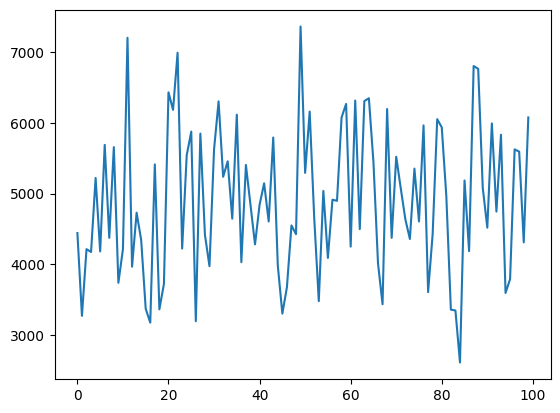

In [25]:
plt.plot(iterations, repel_worst_gravity_multistep_fitness)
plt.show()

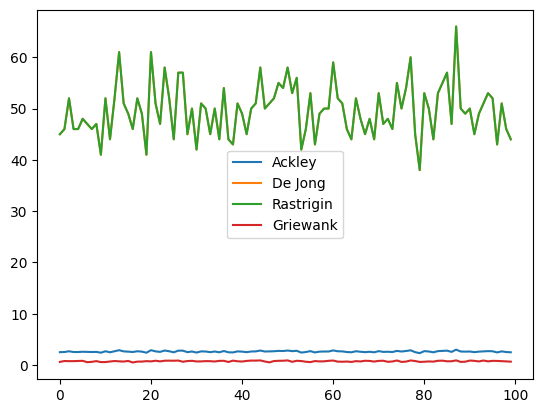

In [26]:
plt.plot(iterations, repel_worst_gravity_multistep_benchmarks_ackley, label="Ackley")
plt.plot(iterations, repel_worst_gravity_multistep_benchmarks_de_jong, label="De Jong")
plt.plot(iterations, repel_worst_gravity_multistep_benchmarks_rastrigin, label="Rastrigin")
plt.plot(iterations, repel_worst_gravity_multistep_benchmarks_griewank, label="Griewank")
plt.legend()
plt.show()

# Comparisons

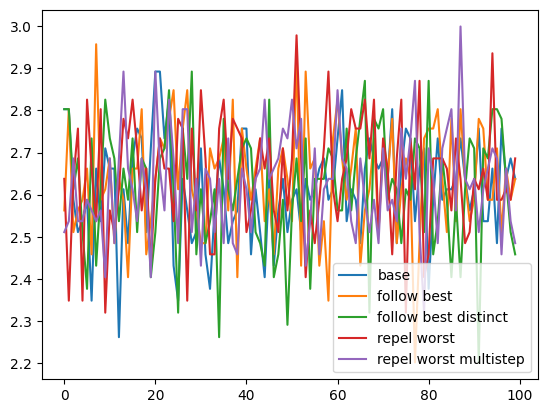

In [30]:
plt.plot(iterations, base_benchmarks_ackley, label="base")
plt.plot(iterations, follow_best_benchmarks_ackley, label="follow best")
plt.plot(iterations, follow_best_distinct_benchmarks_ackley, label="follow best distinct")
plt.plot(iterations, repel_worst_gravity_benchmarks_ackley, label="repel worst")
plt.plot(iterations, repel_worst_gravity_multistep_benchmarks_ackley, label="repel worst multistep")
plt.legend()
plt.show()